# <h1 align="center"> <font color = 'white'> <b>FINAL PROJECT - TECH BLAZERS </b> </font>  </h1>

#**DATA PREPARATION**

## Import Dataset


*Melakukan import dataset dan beberapa library yang diperlukan*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset Final Project/train.csv')
df

id                 date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
0          0  2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1          1  2016-07-01 00:15:00   5.760  2.076  1.492  0.426  4.264  1.401   
2          2  2016-07-01 00:30:00   5.760  1.942  1.492  0.391  4.234  1.310   
3          3  2016-07-01 00:45:00   5.760  1.942  1.492  0.426  4.234  1.310   
4          4  2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
...      ...                  ...     ...    ...    ...    ...    ...    ...   
64315  64315  2018-05-01 22:45:00  12.458  1.407  7.889 -0.746  4.843  1.523   
64316  64316  2018-05-01 23:00:00  14.200  1.541  9.310  0.284  4.752  1.249   
64317  64317  2018-05-01 23:15:00  12.659  1.474  7.924 -0.959  4.569  1.310   
64318  64318  2018-05-01 23:30:00  13.329  1.541  8.671 -0.533  4.630  1.371   
64319  64319  2018-05-01 23:45:00  11.588  0.871  7.214 -0.426  4.691  1.310   

       Temperature  
0        30.531000  
1        30.459999  
2        30.038000  
3        27.013000  
4        27.787001  
...            ...  
64315    10.622000  
64316    10.482000  
64317    10.271000  
64318    10.341000  
64319    10.833000  

[64320 rows x 9 columns]

*df merupakan dataset yang digunakan untuk melatih model agar dapat memprediksi temperature yang mana terdiri atas beberapa kolom yakni :*
- *id merupakan kolom yang menunjukkan indeks dari dataset*
- *date merupakan kolom yang berisi tanggal dan waktu prediksi*
- *Iws merupakan kolom yang berisi data kecepatan angin*
- *Ir merupakan kolom yang berisi data intensitas curah hujan*
- *pm2.5 merupakan kolom yang berisi data materi partikulat halus*
- *PRES merupakan kolom yang berisi data tekanan atmosfer*
- *cbwd merupakan kolom yang berisi data arah pergerakan angin*
- *DEWP merupakan kolom yang berisi data suhu titik embun*

##Cek Data Duplikat

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [id, date, Iws, Ir, pm2.5, PRES, cbwd, DEWP, Temperature]
Index: []

*Hasil output di atas dapat diketahui :*
- *Dari pengecekan data duplikasi diatas tidak ada data sama sekali yang terduplikat*
- *Sehingga tidak diperlukan penanganan apapun untuk data duplikat.*

##Cek Missing Value

In [ ]:
# mengecek missing value yang terdapat di dataset
df.isnull()

id   date    Iws     Ir  pm2.5   PRES   cbwd   DEWP  Temperature
0      False  False  False  False  False  False  False  False        False
1      False  False  False  False  False  False  False  False        False
2      False  False  False  False  False  False  False  False        False
3      False  False  False  False  False  False  False  False        False
4      False  False  False  False  False  False  False  False        False
...      ...    ...    ...    ...    ...    ...    ...    ...          ...
64315  False  False  False  False  False  False  False  False        False
64316  False  False  False  False  False  False  False  False        False
64317  False  False  False  False  False  False  False  False        False
64318  False  False  False  False  False  False  False  False        False
64319  False  False  False  False  False  False  False  False        False

[64320 rows x 9 columns]

*Dari Output di atas dapat diketahui :*
- *Dilihat seklias dari data teratas dan terbawah tidak ada data yang mengandung _missing value_*
- *Untuk itu perlu melakukan pengecekan secara menyeluruh*

In [ ]:
# Melakukan pengecekan secara menyeluruh dan jika ada akan ditampilkan ke tabel
df[df.isnull().any(axis = 1)]

Empty DataFrame
Columns: [id, date, Iws, Ir, pm2.5, PRES, cbwd, DEWP, Temperature]
Index: []

*Keterangan*
- *Hasil diatas digunakan untuk mengecek total kolom yang mengandung missing value, hasilnya adalah 0 semua*
- *artinya data diatas benar benar sudah bersih dari missing value*

##Menghapus Kolom

In [ ]:
# menghapus kolom id
df.drop(columns=["id"], inplace=True)
df.head()

date    Iws     Ir  pm2.5   PRES   cbwd   DEWP  Temperature
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340    30.531000
1  2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401    30.459999
2  2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310    30.038000
3  2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310    27.013000
4  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371    27.787001

*Keterangan*
- *Menghapus kolom ID, karena tidak diperlukan*

In [ ]:
# melihat statistik deskriptif
df.describe()

Iws            Ir         pm2.5          PRES          cbwd  \
count  64320.000000  64320.000000  64320.000000  64320.000000  64320.000000   
mean       7.522545      2.142897      4.478698      0.820356      3.042537   
std        6.914888      2.023449      6.669074      1.818778      1.169700   
min      -21.568001     -5.693000    -23.986000     -6.041000     -1.188000   
25%        5.961000      0.670000      3.553000     -0.391000      2.284000   
50%        8.841000      2.076000      6.041000      0.853000      2.802000   
75%       11.721000      3.550000      8.635000      2.132000      3.594000   
max       24.180000     10.315000     18.087000      7.853000      8.498000   

               DEWP   Temperature  
count  64320.000000  64320.000000  
mean       0.819362     13.610430  
std        0.602287      8.827735  
min       -1.371000     -4.221000  
25%        0.640000      6.753000  
50%        0.944000     11.959000  
75%        1.157000     18.712000  
max        3.046000     46.007000

##Cek Outlier

In [ ]:
kolom = ['lws','lr', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']

batas_kolom = {}

*kolom 'date' tidak perlu cek outlier karena bukan berbentuk data nominal/continue*

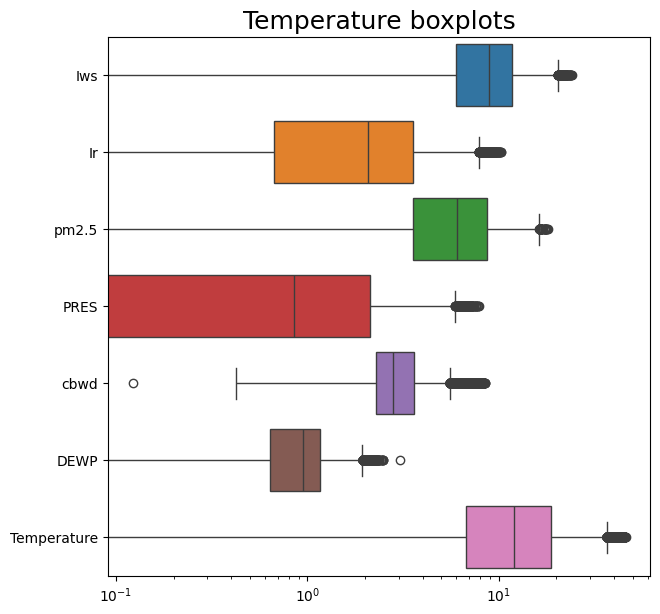

In [ ]:
#cek outlier data
plt.figure(figsize = (7,7))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Temperature boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

*terlihat bahwa masing-masing kolom memiliki cukup banyak outlier*

In [ ]:
kolom1 = ['Iws','Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']

batas_kolom = {}

In [ ]:
for kolom in kolom1:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas_kolom[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom1:
    lower_bound, upper_bound = batas_kolom[kolom]
    outliers[kolom] = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

In [ ]:
for kolom, (lower_bound, upper_bound) in batas_kolom.items():
    print(f"Kolom '{kolom}':")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print()

Kolom 'Iws':
  Lower Bound: -2.678999662399292
  Upper Bound: 20.36099934577942

Kolom 'Ir':
  Lower Bound: -3.649999886751175
  Upper Bound: 7.86999985575676

Kolom 'pm2.5':
  Lower Bound: -4.070000410079956
  Upper Bound: 16.25800061225891

Kolom 'PRES':
  Lower Bound: -4.175499960780144
  Upper Bound: 5.916499927639961

Kolom 'cbwd':
  Lower Bound: 0.3189996480941779
  Upper Bound: 5.559000372886657

Kolom 'DEWP':
  Lower Bound: -0.1354999542236328
  Upper Bound: 1.932499885559082

Kolom 'Temperature':
  Lower Bound: -11.185500383377082
  Upper Bound: 36.65050005912782



In [ ]:
print(f"Outliers pada kolom 'Iws':")
outliers['Iws']

Outliers pada kolom 'Iws':


date        Iws     Ir   pm2.5   PRES   cbwd   DEWP  \
2589   2016-07-27 23:15:00  21.568001  3.751  14.072  0.817  7.493  1.645   
2590   2016-07-27 23:30:00  22.103001  3.483  13.859  0.497  7.371  1.645   
2591   2016-07-27 23:45:00  20.898001  3.215  13.788  0.355  7.219  1.675   
2592   2016-07-28 00:00:00  21.434000  3.818  14.178  0.497  7.127  1.706   
2595   2016-07-28 00:45:00  20.629999  3.349  13.148  0.320  6.853  1.706   
...                    ...        ...    ...     ...    ...    ...    ...   
64282  2018-05-01 14:30:00 -16.343000  1.273 -19.438 -0.711  2.894  1.432   
64283  2018-05-01 14:45:00  -8.774000 -0.134 -11.940 -1.279  2.985  1.614   
64284  2018-05-01 15:00:00  -6.162000  0.000  -8.742 -2.061  2.894  1.401   
64285  2018-05-01 15:15:00  -5.492000 -0.402  -9.239 -2.132  2.833  1.371   
64287  2018-05-01 15:45:00  -4.086000 -0.603  -7.107 -1.670  2.559  1.157   

       Temperature  
2589     39.324001  
2590     38.480000  
2591     39.745998  
2592     39.324001  
2595     40.379002  
...            ...  
64282    13.225000  
64283    13.296000  
64284    13.507000  
64285    13.858000  
64287    13.647000  

[6713 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom Iws adalah 6713 baris*

In [ ]:
print(f"Outliers pada kolom 'Ir':")
outliers['Ir']

Outliers pada kolom 'Ir':


date        Iws     Ir      pm2.5   PRES   cbwd   DEWP  \
764    2016-07-08 23:00:00  18.152000  8.841  12.402000  4.193  5.818  3.046   
3754   2016-08-09 02:30:00  17.146999  8.172  12.011000  5.153  5.361  1.645   
3756   2016-08-09 03:00:00  17.951000  8.239  12.437000  4.762  5.300  1.614   
3757   2016-08-09 03:15:00  16.879000  8.038  11.620000  4.335  5.087  1.553   
3759   2016-08-09 03:45:00  17.348000  8.038  12.153000  5.082  5.026  1.523   
...                    ...        ...    ...        ...    ...    ...    ...   
61975  2018-04-07 13:45:00 -15.874000  9.176 -19.082001  6.894  2.224  0.853   
61976  2018-04-07 14:00:00 -14.803000  9.243 -17.839001  7.569  2.467  1.036   
61977  2018-04-07 14:15:00 -14.602000  8.908 -16.950001  6.929  2.224  0.914   
61978  2018-04-07 14:30:00 -12.994000  8.774 -15.316000  6.787  2.284  0.975   
61979  2018-04-07 14:45:00 -12.726000  8.172 -15.245000  6.574  2.193  1.005   

       Temperature  
764      30.531000  
3754     33.344002  
3756     33.415001  
3757     32.993000  
3759     33.203999  
...            ...  
61975     4.643000  
61976     4.502000  
61977     4.643000  
61978     4.854000  
61979     4.995000  

[249 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom Ir adalah 249 baris*

In [ ]:
print(f"Outliers pada kolom 'pm2.5':")
outliers['pm2.5']

Outliers pada kolom 'pm2.5':


date        Iws     Ir      pm2.5   PRES   cbwd   DEWP  \
2876   2016-07-30 23:00:00  20.965000  3.684  16.417000  1.244  5.300  1.310   
2877   2016-07-30 23:15:00  21.367001  2.947  16.417000  0.391  4.995  1.492   
2878   2016-07-30 23:30:00  21.969000  2.746  16.594999  0.426  4.934  1.157   
2879   2016-07-30 23:45:00  21.367001  3.617  16.346001  0.533  4.660  1.249   
2880   2016-07-31 00:00:00  21.367001  3.617  16.346001  0.533  4.660  1.249   
...                    ...        ...    ...        ...    ...    ...    ...   
64283  2018-05-01 14:45:00  -8.774000 -0.134 -11.940000 -1.279  2.985  1.614   
64284  2018-05-01 15:00:00  -6.162000  0.000  -8.742000 -2.061  2.894  1.401   
64285  2018-05-01 15:15:00  -5.492000 -0.402  -9.239000 -2.132  2.833  1.371   
64286  2018-05-01 15:30:00  -2.545000 -0.938  -5.259000 -2.452  2.772  1.371   
64287  2018-05-01 15:45:00  -4.086000 -0.603  -7.107000 -1.670  2.559  1.157   

       Temperature  
2876     37.917000  
2877     37.917000  
2878     38.269001  
2879     38.269001  
2880     38.269001  
...            ...  
64283    13.296000  
64284    13.507000  
64285    13.858000  
64286    13.999000  
64287    13.647000  

[7547 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom pm2.5 adalah 7547 baris*

In [ ]:
print(f"Outliers pada kolom 'PRES':")
outliers['PRES']

Outliers pada kolom 'PRES':


date        Iws     Ir      pm2.5   PRES   cbwd   DEWP  \
3869   2016-08-10 07:15:00  16.544001  8.439  13.539000  5.934  2.985  1.279   
3870   2016-08-10 07:30:00  15.472000  8.105  12.722000  6.041  3.076  1.249   
13540  2016-11-19 01:00:00  17.013000  8.038  13.041000  6.076  3.899  1.097   
13550  2016-11-19 03:30:00  16.611000  7.904  12.935000  5.970  3.868  1.127   
25427  2017-03-22 20:45:00   6.832000 -3.550   4.442000 -4.904  2.772  0.975   
...                    ...        ...    ...        ...    ...    ...    ...   
61975  2018-04-07 13:45:00 -15.874000  9.176 -19.082001  6.894  2.224  0.853   
61976  2018-04-07 14:00:00 -14.803000  9.243 -17.839001  7.569  2.467  1.036   
61977  2018-04-07 14:15:00 -14.602000  8.908 -16.950001  6.929  2.224  0.914   
61978  2018-04-07 14:30:00 -12.994000  8.774 -15.316000  6.787  2.284  0.975   
61979  2018-04-07 14:45:00 -12.726000  8.172 -15.245000  6.574  2.193  1.005   

       Temperature  
3869     31.514999  
3870     31.726000  
13540    19.134001  
13550    21.455999  
25427     5.909000  
...            ...  
61975     4.643000  
61976     4.502000  
61977     4.643000  
61978     4.854000  
61979     4.995000  

[320 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom PRES adalah 320 baris*

In [ ]:
print(f"Outliers pada kolom 'cbwd':")
outliers['cbwd']

Outliers pada kolom 'cbwd':


date     Iws     Ir   pm2.5   PRES   cbwd   DEWP  \
726    2016-07-08 13:30:00  12.324  5.291   6.894  2.168  5.574  2.163   
728    2016-07-08 14:00:00  12.927  5.023   6.752  1.528  5.696  2.224   
764    2016-07-08 23:00:00  18.152  8.841  12.402  4.193  5.818  3.046   
832    2016-07-09 16:00:00  11.989  4.153   6.432  1.528  5.604  2.193   
833    2016-07-09 16:15:00  12.123  4.287   6.467  1.421  5.665  2.132   
...                    ...     ...    ...     ...    ...    ...    ...   
64155  2018-04-30 06:45:00  11.119  1.741   5.686 -0.391  5.574  1.736   
64156  2018-04-30 07:00:00  13.597  3.684   7.782  1.102  5.726  1.767   
64157  2018-04-30 07:15:00  11.922  3.215   6.325  0.569  5.604  1.828   
64247  2018-05-01 05:45:00  16.343  2.679  10.625  0.569  5.574  1.462   
64256  2018-05-01 08:00:00   6.698  0.670   0.995 -1.137  5.726  2.041   

       Temperature  
726      32.219002  
728      32.710999  
764      30.531000  
832      32.852001  
833      34.048000  
...            ...  
64155    12.874000  
64156    12.944000  
64157    13.014000  
64247    13.647000  
64256    14.069000  

[2159 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom cbwd adalah 2159 baris*

In [ ]:
print(f"Outliers pada kolom 'DEWP':")
outliers['DEWP']

Outliers pada kolom 'DEWP':


date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
25     2016-07-01 06:15:00   7.502  3.215  2.239  0.888  5.330  1.980   
28     2016-07-01 07:00:00   7.435  3.282  2.310  1.031  5.087  2.224   
29     2016-07-01 07:15:00   7.636  3.282  2.274  1.066  5.330  2.071   
151    2016-07-02 13:45:00   8.908  4.890  6.219  2.665  2.833  1.949   
193    2016-07-03 00:15:00   9.980  5.291  7.889  2.949  2.863  2.071   
...                    ...     ...    ...    ...    ...    ...    ...   
64256  2018-05-01 08:00:00   6.698  0.670  0.995 -1.137  5.726  2.041   
64257  2018-05-01 08:15:00   5.358  1.340  0.071 -1.208  5.361  1.949   
64258  2018-05-01 08:30:00   5.224  1.340  0.497 -0.782  5.361  2.010   
64313  2018-05-01 22:15:00  11.721  1.808  6.823 -0.782  4.752  2.163   
64314  2018-05-01 22:30:00  11.922  1.808  6.432 -1.315  4.752  2.102   

       Temperature  
25       23.848000  
28       23.143999  
29       23.777000  
151      20.471001  
193      28.771999  
...            ...  
64256    14.069000  
64257    13.718000  
64258    13.507000  
64313    10.693000  
64314    10.482000  

[6998 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom DEWP adalah 6998 baris*

In [ ]:
print(f"Outliers pada kolom 'Temperature':")
outliers['Temperature']

Outliers pada kolom 'Temperature':


date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
631   2016-07-07 13:45:00  10.650  4.019  7.249  1.990  2.619  1.523   
632   2016-07-07 14:00:00   9.377  3.818  6.574  1.564  2.650  1.553   
633   2016-07-07 14:15:00   9.846  3.751  7.533  2.168  3.046  1.675   
634   2016-07-07 14:30:00  10.717  4.488  8.031  2.239  2.589  1.492   
635   2016-07-07 14:45:00   9.109  4.287  6.752  1.421  2.559  1.614   
...                   ...     ...    ...    ...    ...    ...    ...   
4771  2016-08-19 16:45:00  14.200  5.157  9.239  3.092  4.934  1.492   
4772  2016-08-19 17:00:00  14.200  5.358  9.204  3.020  5.026  1.432   
4773  2016-08-19 17:15:00  13.932  5.090  8.990  2.878  4.873  1.645   
4774  2016-08-19 17:30:00  13.664  5.090  8.635  2.843  4.904  1.340   
4775  2016-08-19 17:45:00  13.463  4.890  8.564  2.523  4.782  1.523   

      Temperature  
631     37.002998  
632     37.284000  
633     37.917000  
634     38.832001  
635     38.972000  
...           ...  
4771    38.832001  
4772    38.549999  
4773    37.776001  
4774    37.002998  
4775    36.862000  

[1256 rows x 8 columns]

*Dari output di atas dapat diketahui jika banyaknya outlier pada kolom Temperature adalah 1256 baris*

***Penanganan Outlier***

*Mengingat data ini merupakan data tentang prediksi suhu dengan format time series yang berkaitan dengan cuaca, maka outlier tidak ditangani, hal ini dimaksudkan untuk dapat menemukan pola atau anomali.*

##Inkonsistensi Data

*Melakukan checking terhadap kekonsistenan data*

In [ ]:
df

date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
0      2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1      2016-07-01 00:15:00   5.760  2.076  1.492  0.426  4.264  1.401   
2      2016-07-01 00:30:00   5.760  1.942  1.492  0.391  4.234  1.310   
3      2016-07-01 00:45:00   5.760  1.942  1.492  0.426  4.234  1.310   
4      2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
...                    ...     ...    ...    ...    ...    ...    ...   
64315  2018-05-01 22:45:00  12.458  1.407  7.889 -0.746  4.843  1.523   
64316  2018-05-01 23:00:00  14.200  1.541  9.310  0.284  4.752  1.249   
64317  2018-05-01 23:15:00  12.659  1.474  7.924 -0.959  4.569  1.310   
64318  2018-05-01 23:30:00  13.329  1.541  8.671 -0.533  4.630  1.371   
64319  2018-05-01 23:45:00  11.588  0.871  7.214 -0.426  4.691  1.310   

       Temperature  
0        30.531000  
1        30.459999  
2        30.038000  
3        27.013000  
4        27.787001  
...            ...  
64315    10.622000  
64316    10.482000  
64317    10.271000  
64318    10.341000  
64319    10.833000  

[64320 rows x 8 columns]

*Dari output di atas terlihat bahwa data tidak kosisten dalam banyaknya jumlah angka dibelakang koma.*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         64320 non-null  object 
 1   Iws          64320 non-null  float64
 2   Ir           64320 non-null  float64
 3   pm2.5        64320 non-null  float64
 4   PRES         64320 non-null  float64
 5   cbwd         64320 non-null  float64
 6   DEWP         64320 non-null  float64
 7   Temperature  64320 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.9+ MB


In [ ]:
Angka = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
df[Angka] = df[Angka].apply(lambda x: round(x, 3))
df.head()

date    Iws     Ir  pm2.5   PRES   cbwd   DEWP  Temperature
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340       30.531
1  2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401       30.460
2  2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310       30.038
3  2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310       27.013
4  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371       27.787

*Data diubah menjadi desimal 3 angka dibelakang koma agar memudahkan ketika membaca data*

In [ ]:
import pandas as pd
df['date'] = pd.to_datetime(df['date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         64320 non-null  datetime64[ns]
 1   Iws          64320 non-null  float64       
 2   Ir           64320 non-null  float64       
 3   pm2.5        64320 non-null  float64       
 4   PRES         64320 non-null  float64       
 5   cbwd         64320 non-null  float64       
 6   DEWP         64320 non-null  float64       
 7   Temperature  64320 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.9 MB
None


*Kolom 'date' diubah type dari object menjadi datetime, kolom lainnya sudah sesuai*

## Standarisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Inisialisasi StandardScaler
scaler = MinMaxScaler()

# Lakukan standarisasi hanya pada kolom numerik
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Masukkan kembali fitur yang distandarisasi ke dalam dataframe dengan kolom asli
numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns, index=df.index)

# Gabungkan kembali dengan kolom non-numerik
df_scaled = df.drop(columns=numerical_features.columns).join(numerical_features_scaled_df)

# Cetak DataFrame yang telah distandarisasi
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd  \
0     2016-07-01 00:00:00  0.598824  0.481134  0.608110  0.468044  0.556577   
1     2016-07-01 00:15:00  0.597359  0.485320  0.605567  0.465453  0.562874   
2     2016-07-01 00:30:00  0.597359  0.476949  0.605567  0.462934  0.559777   
3     2016-07-01 00:45:00  0.597359  0.476949  0.605567  0.465453  0.559777   
4     2016-07-01 01:00:00  0.595895  0.485320  0.605567  0.465453  0.550279   
...                   ...       ...       ...       ...       ...       ...   
64315 2018-05-01 22:45:00  0.743770  0.443528  0.757612  0.381100  0.622651   
64316 2018-05-01 23:00:00  0.781848  0.451899  0.791386  0.455232  0.613256   
64317 2018-05-01 23:15:00  0.748164  0.447714  0.758444  0.365769  0.594363   
64318 2018-05-01 23:30:00  0.762809  0.451899  0.776199  0.396430  0.600661   
64319 2018-05-01 23:45:00  0.724753  0.410045  0.741568  0.404131  0.606958   

           DEWP  Temperature  
0      0.613765     0.691885  
1      0.627575     0.690471  
2      0.606973     0.682070  
3      0.606973     0.621844  
4      0.620783     0.637254  
...         ...          ...  
64315  0.655196     0.295512  
64316  0.593163     0.292725  
64317  0.606973     0.288524  
64318  0.620783     0.289918  
64319  0.606973     0.299713  

[64320 rows x 8 columns]

Kolom target (Temperature) tidak dilakukan standarisasi agar konsistensi interpretasi. Karena Jika kolom target distandarisasi, prediksi model akan berada pada skala yang berbeda, yang mungkin membuat interpretasi hasil menjadi lebih sulit.

In [ ]:
df_scaled_without_temp = df_scaled.drop(columns=['Temperature'])
df_scaled_without_temp

date       Iws        Ir     pm2.5      PRES      cbwd  \
0     2016-07-01 00:00:00  0.598824  0.481134  0.608110  0.468044  0.556577   
1     2016-07-01 00:15:00  0.597359  0.485320  0.605567  0.465453  0.562874   
2     2016-07-01 00:30:00  0.597359  0.476949  0.605567  0.462934  0.559777   
3     2016-07-01 00:45:00  0.597359  0.476949  0.605567  0.465453  0.559777   
4     2016-07-01 01:00:00  0.595895  0.485320  0.605567  0.465453  0.550279   
...                   ...       ...       ...       ...       ...       ...   
64315 2018-05-01 22:45:00  0.743770  0.443528  0.757612  0.381100  0.622651   
64316 2018-05-01 23:00:00  0.781848  0.451899  0.791386  0.455232  0.613256   
64317 2018-05-01 23:15:00  0.748164  0.447714  0.758444  0.365769  0.594363   
64318 2018-05-01 23:30:00  0.762809  0.451899  0.776199  0.396430  0.600661   
64319 2018-05-01 23:45:00  0.724753  0.410045  0.741568  0.404131  0.606958   

           DEWP  
0      0.613765  
1      0.627575  
2      0.606973  
3      0.606973  
4      0.620783  
...         ...  
64315  0.655196  
64316  0.593163  
64317  0.606973  
64318  0.620783  
64319  0.606973  

[64320 rows x 7 columns]

In [ ]:
data_temperature = df[['Temperature']].copy()
data_temperature

Temperature
0           30.531
1           30.460
2           30.038
3           27.013
4           27.787
...            ...
64315       10.622
64316       10.482
64317       10.271
64318       10.341
64319       10.833

[64320 rows x 1 columns]

In [ ]:
df_scaled = pd.concat([df_scaled_without_temp, data_temperature], axis=1)
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd  \
0     2016-07-01 00:00:00  0.598824  0.481134  0.608110  0.468044  0.556577   
1     2016-07-01 00:15:00  0.597359  0.485320  0.605567  0.465453  0.562874   
2     2016-07-01 00:30:00  0.597359  0.476949  0.605567  0.462934  0.559777   
3     2016-07-01 00:45:00  0.597359  0.476949  0.605567  0.465453  0.559777   
4     2016-07-01 01:00:00  0.595895  0.485320  0.605567  0.465453  0.550279   
...                   ...       ...       ...       ...       ...       ...   
64315 2018-05-01 22:45:00  0.743770  0.443528  0.757612  0.381100  0.622651   
64316 2018-05-01 23:00:00  0.781848  0.451899  0.791386  0.455232  0.613256   
64317 2018-05-01 23:15:00  0.748164  0.447714  0.758444  0.365769  0.594363   
64318 2018-05-01 23:30:00  0.762809  0.451899  0.776199  0.396430  0.600661   
64319 2018-05-01 23:45:00  0.724753  0.410045  0.741568  0.404131  0.606958   

           DEWP  Temperature  
0      0.613765       30.531  
1      0.627575       30.460  
2      0.606973       30.038  
3      0.606973       27.013  
4      0.620783       27.787  
...         ...          ...  
64315  0.655196       10.622  
64316  0.593163       10.482  
64317  0.606973       10.271  
64318  0.620783       10.341  
64319  0.606973       10.833  

[64320 rows x 8 columns]

In [ ]:
import pandas as pd
df_scaled['date'] = pd.to_datetime(df_scaled['date'])

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         64320 non-null  datetime64[ns]
 1   Iws          64320 non-null  float64       
 2   Ir           64320 non-null  float64       
 3   pm2.5        64320 non-null  float64       
 4   PRES         64320 non-null  float64       
 5   cbwd         64320 non-null  float64       
 6   DEWP         64320 non-null  float64       
 7   Temperature  64320 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.9 MB


#**EDA**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-30-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
import pandas as pd
# Ubah kolom 'date' menjadi datetime
df_scaled['date'] = pd.to_datetime(df_scaled['date'])

# Pisahkan tanggal dan waktu dengan delimiter spasi
df_scaled[['date', 'time']] = df_scaled['date'].astype(str).str.split(' ', expand=True)

# Pisahkan tanggal menjadi tiga kolom terpisah
df_scaled[['year', 'month', 'day']] = df_scaled['date'].str.split('-', expand=True)

# Tampilkan DataFrame hasil
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0      2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1      2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2      2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3      2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4      2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...           ...       ...       ...       ...       ...       ...       ...   
64315  2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316  2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317  2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318  2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319  2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  
0           30.531  00:00:00  2016    07  01  
1           30.460  00:15:00  2016    07  01  
2           30.038  00:30:00  2016    07  01  
3           27.013  00:45:00  2016    07  01  
4           27.787  01:00:00  2016    07  01  
...            ...       ...   ...   ...  ..  
64315       10.622  22:45:00  2018    05  01  
64316       10.482  23:00:00  2018    05  01  
64317       10.271  23:15:00  2018    05  01  
64318       10.341  23:30:00  2018    05  01  
64319       10.833  23:45:00  2018    05  01  

[64320 rows x 12 columns]

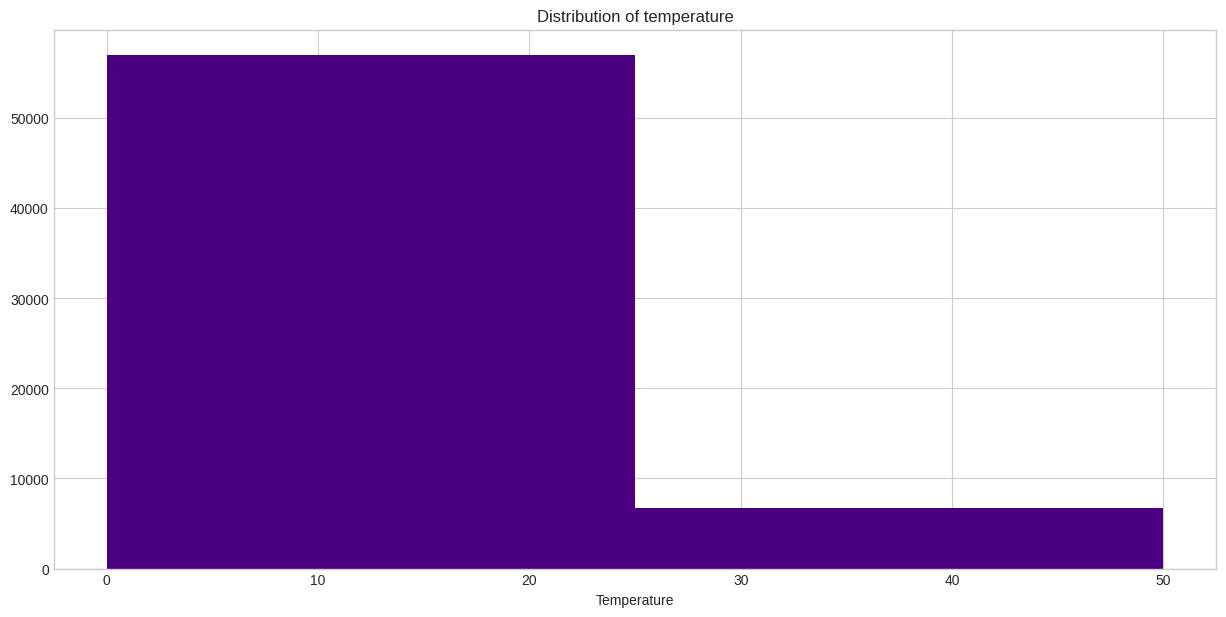

In [ ]:
plt.figure(figsize = (15, 7))
bins = np.arange(0, df_scaled['Temperature'].max() + 25, 25)
plt.hist(data = df_scaled, x = 'Temperature', bins = bins, color = 'indigo')
plt.title('Distribution of temperature')
plt.xlabel('Temperature')
plt.show();

year
2016    21.399399
2017    12.423832
2018     5.345457
Name: Temperature, dtype: float64


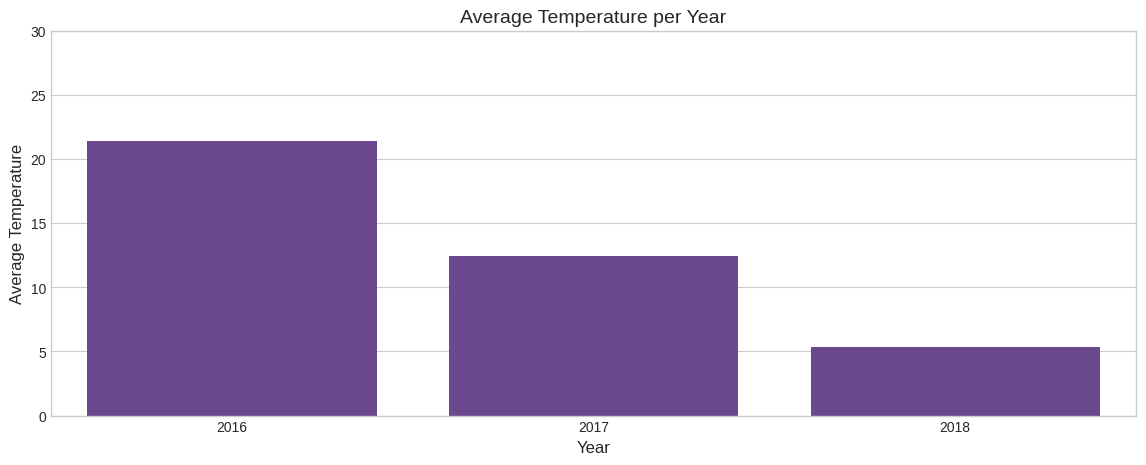

In [ ]:
year = df_scaled.groupby('year')['Temperature'].mean().sort_index()
print(year)

y = [0,5,10,15,20,25,30]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [14, 5])
sns.barplot(x = year.index, y = year, color = base_color)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Temperature', fontsize = 12)
plt.title('Average Temperature per Year', fontsize = 14)
plt.yticks(y)
plt.show()

*Dari grafik di atas, didapatkan bahwa rata-rata suhu per tahunnya menurun cukup jauh. Hal ini kemungkinan disebabkan karena adanya perubahan dalam pola cuaca lokal atau kejadian cuaca ekstrem tertentu seperti musim hujan yang basah atau musim kemarau yang panjang dapat menyebabkan fluktuasi dalam suhu rata-rata per tahun.*

<ipython-input-34-9eff44f2b7c0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x = 'month', y = 'Temperature', data = df_scaled, kind = 'bar', row = 'year', ci = None,


<Figure size 1600x800 with 0 Axes>

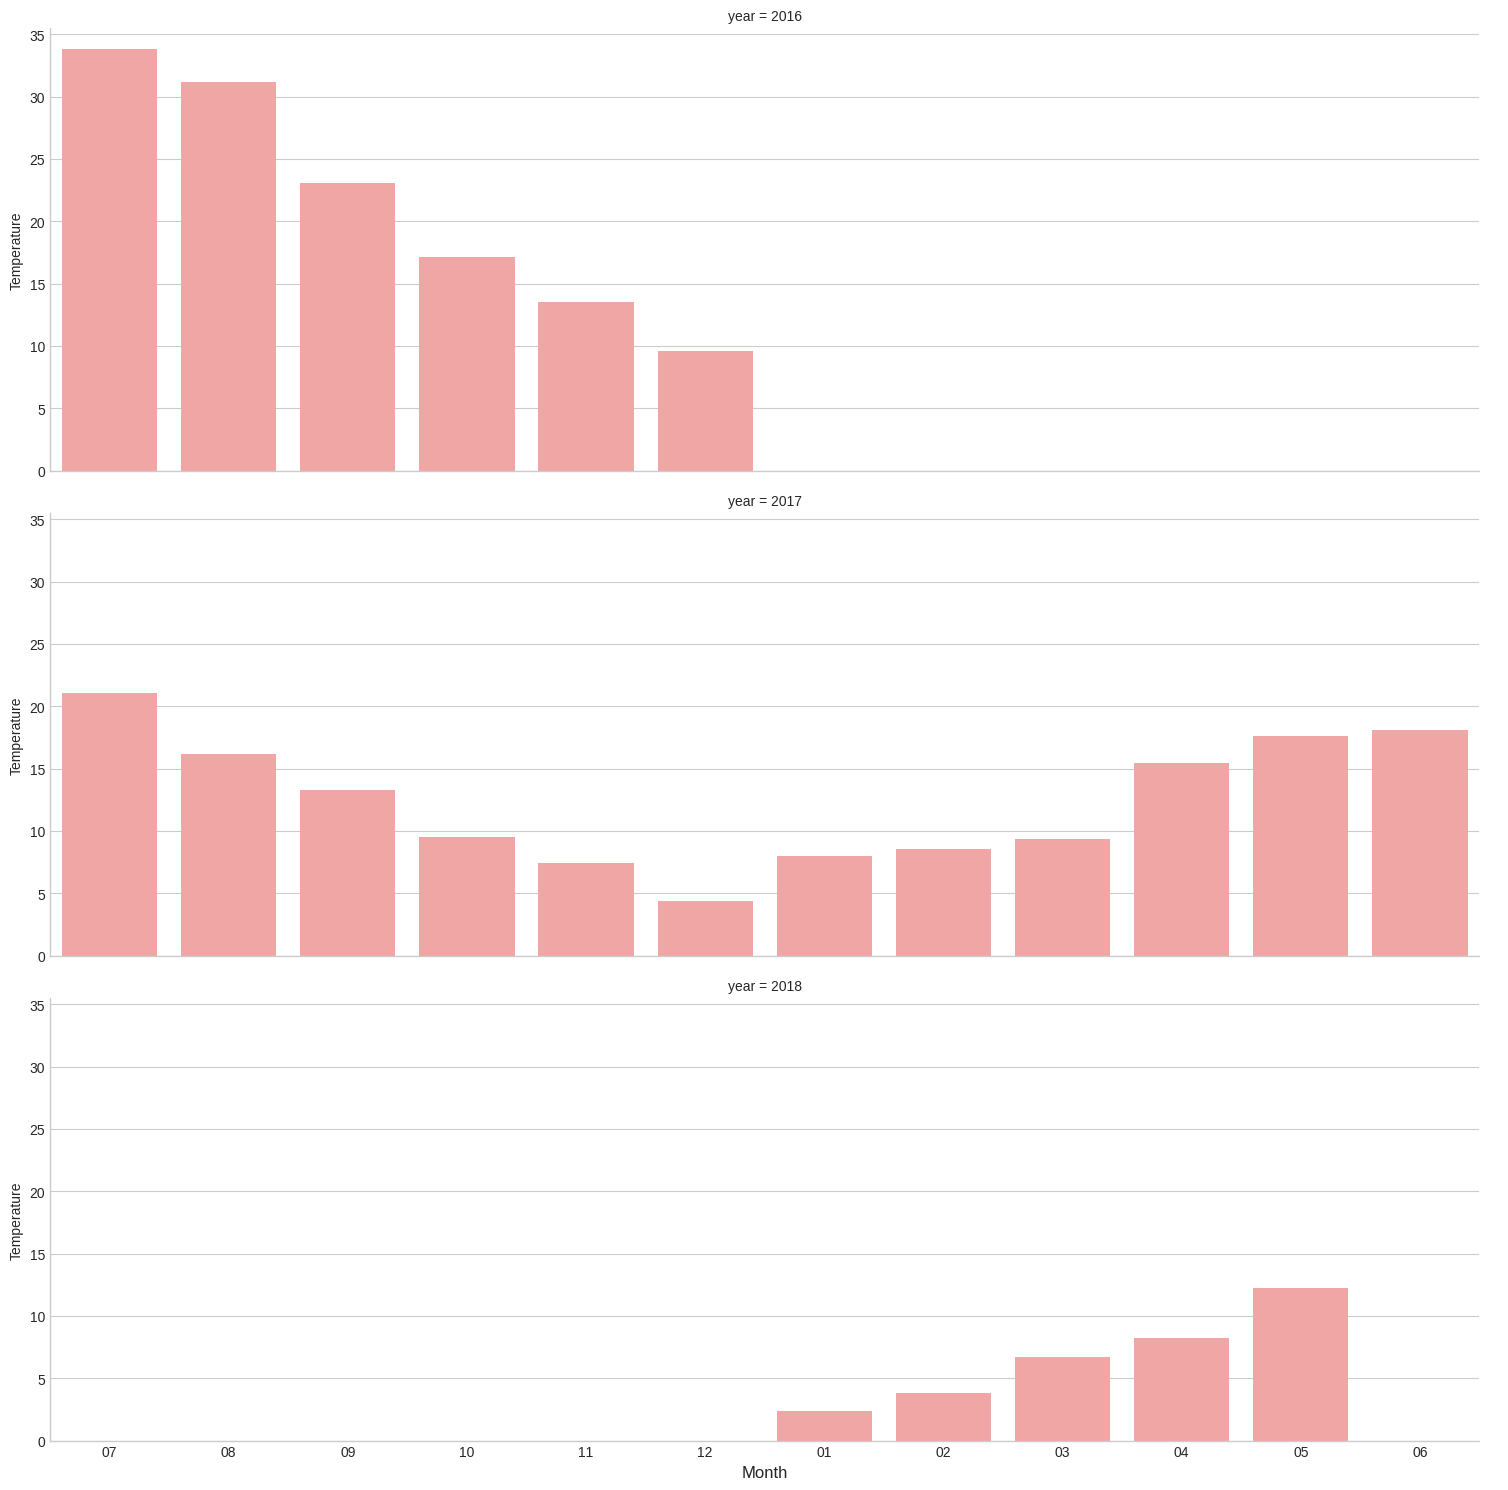

In [ ]:
date = df_scaled.groupby('month')['Temperature'].mean().sort_index()
base_color = sns.color_palette("Paired")[4]
plt.figure(figsize= [16, 8])
g = sns.catplot(x = 'month', y = 'Temperature', data = df_scaled, kind = 'bar', row = 'year', ci = None,
            color = base_color, height =5, aspect = 3)
axes = g.axes.flatten()

plt.xlabel('Month', fontsize = 12)
plt.show();

<Axes: >

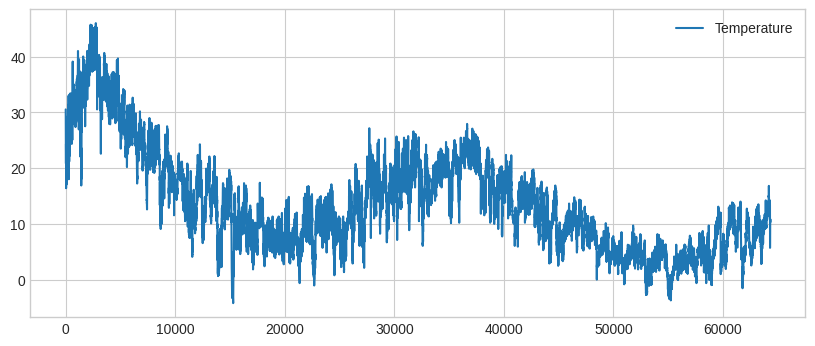

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df_scaled['Temperature'].plot(legend=True,figsize=(10,4))

Index(['date', 'Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature',
       'time', 'year', 'month', 'day'],
      dtype='object')


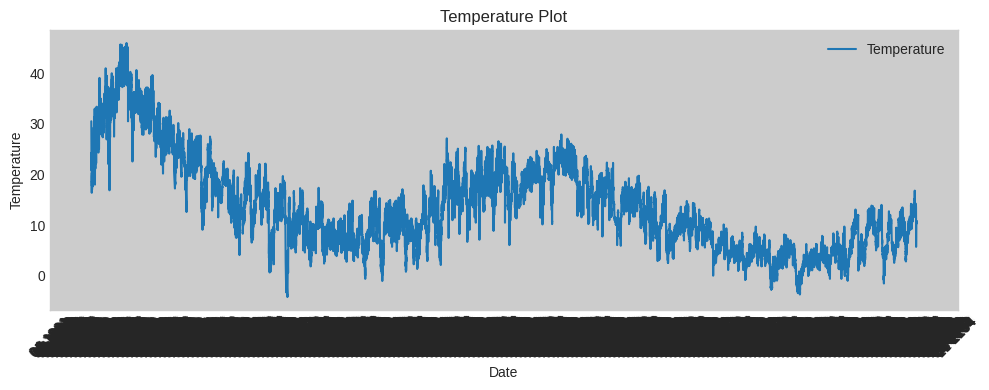

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Pastikan nama kolom 'date' benar
print(df_scaled.columns)  # Periksa kolom yang ada di DataFrame

# Jika nama kolom berbeda, ganti 'date' dengan nama yang sesuai di DataFrame
# Misalnya, jika kolomnya adalah 'Date' gunakan df_scaled['Date']

# Ubah 'date' menjadi tipe data datetime
df_scaled['date'] = pd.to_datetime(df_scaled['date'])


# Plot data temperature
plt.figure(figsize=(10, 4))
df_scaled['Temperature'].plot(legend=True)

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Plot')

# Mengatur format tanggal pada sumbu x menjadi MM YYYY
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Menampilkan setiap bulan

# Rotasi label tanggal untuk tampilan yang lebih baik
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


*Dari grafik di atas dapat dibuktikan bahwa suhu mengalami tren yang menurun.*

Cek Stasioneritas

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

nilai_data = df_scaled['Temperature']

# Augmented Dickey-Fuller (ADF)
result_adf = adfuller(nilai_data)
print('ADF Test:')
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:')
for key, value in result_adf[4].items():
   print(f'\t{key}: {value}')

ADF Test:
ADF Statistic: -4.040257531828051
p-value: 0.0012137779956698008
Critical Values:
	1%: -3.4304517703826356
	5%: -2.861584980638992
	10%: -2.5667939416681875


_Didapatkan kesimpulan bahwa data tersebut stasioner, karena nilai ADF Statistic lebih negatif daripada semua nilai critical values dan nilai p-value sangat kecil._

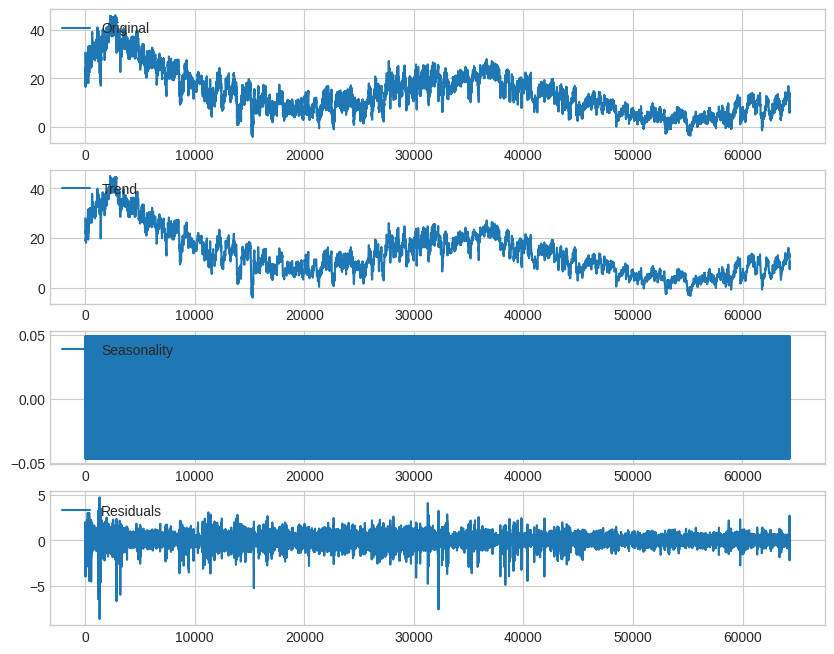

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekomposisi Time Series
decomposition = seasonal_decompose(nilai_data, period = 12)

# Plot komponen-komponen hasil dekomposisi
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(nilai_data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.show()

_Dapat dibuktikan bahwa dataset ini tidak memiliki pengaruh musiman dan termasuk dalam data tren._

#**FEATURE ENGINEERING**

##1. Pembagian Waktu

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         64320 non-null  datetime64[ns]
 1   Iws          64320 non-null  float64       
 2   Ir           64320 non-null  float64       
 3   pm2.5        64320 non-null  float64       
 4   PRES         64320 non-null  float64       
 5   cbwd         64320 non-null  float64       
 6   DEWP         64320 non-null  float64       
 7   Temperature  64320 non-null  float64       
 8   time         64320 non-null  object        
 9   year         64320 non-null  object        
 10  month        64320 non-null  object        
 11  day          64320 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 5.9+ MB


In [ ]:
df_scaled['time'] = pd.to_datetime(df_scaled['time'], format='%H:%M:%S')
df_scaled['hour'] = df_scaled['time'].dt.hour

# Fungsi untuk menentukan kategori waktu
def hour_category(hour):
    if 0 <= hour < 6:
        return 'Morning'
    elif 6 <= hour < 12:
        return 'Afternoon'
    elif 12 <= hour < 18:
        return 'Evening'
    else:
        return 'Night'

# Terapkan fungsi kategori waktu ke kolom 'hour'
df_scaled['Time Period'] = df_scaled['hour'].apply(hour_category)

# Kembalikan kolom 'time' ke format hanya waktu (datetime.time)
df_scaled['time'] = df_scaled['time'].dt.time

# Tampilkan DataFrame hasil
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0     2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1     2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2     2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3     2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4     2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...          ...       ...       ...       ...       ...       ...       ...   
64315 2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319 2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  hour Time Period  
0           30.531  00:00:00  2016    07  01     0     Morning  
1           30.460  00:15:00  2016    07  01     0     Morning  
2           30.038  00:30:00  2016    07  01     0     Morning  
3           27.013  00:45:00  2016    07  01     0     Morning  
4           27.787  01:00:00  2016    07  01     1     Morning  
...            ...       ...   ...   ...  ..   ...         ...  
64315       10.622  22:45:00  2018    05  01    22       Night  
64316       10.482  23:00:00  2018    05  01    23       Night  
64317       10.271  23:15:00  2018    05  01    23       Night  
64318       10.341  23:30:00  2018    05  01    23       Night  
64319       10.833  23:45:00  2018    05  01    23       Night  

[64320 rows x 14 columns]

In [ ]:
X = df_scaled['Time Period'].value_counts()
X

Time Period
Morning      16080
Afternoon    16080
Evening      16080
Night        16080
Name: count, dtype: int64

_Data tersebut ternyata memiliki pembagian yang setara dari mulai pagi hingga malam._

##Cuaca Ekstrim

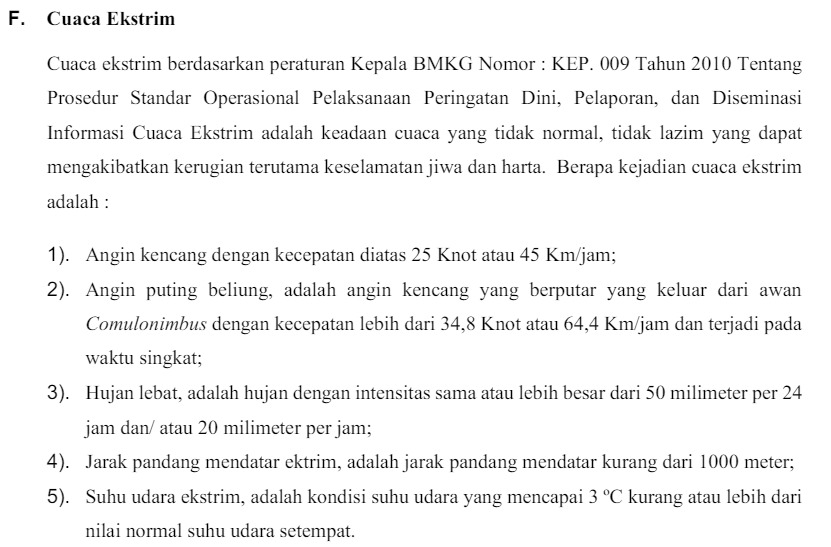

In [ ]:
def cek_cuaca_ekstrim(row):
    if row['Temperature'] < 3 or row['Iws'] > 12.5:
        return 1  # Hari cuaca ekstrim
    else:
        return 0  # Bukan hari cuaca ekstrim

df_scaled['Extreme Weather'] = df.apply(cek_cuaca_ekstrim, axis=1)
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0     2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1     2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2     2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3     2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4     2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...          ...       ...       ...       ...       ...       ...       ...   
64315 2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319 2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  hour Time Period  \
0           30.531  00:00:00  2016    07  01     0     Morning   
1           30.460  00:15:00  2016    07  01     0     Morning   
2           30.038  00:30:00  2016    07  01     0     Morning   
3           27.013  00:45:00  2016    07  01     0     Morning   
4           27.787  01:00:00  2016    07  01     1     Morning   
...            ...       ...   ...   ...  ..   ...         ...   
64315       10.622  22:45:00  2018    05  01    22       Night   
64316       10.482  23:00:00  2018    05  01    23       Night   
64317       10.271  23:15:00  2018    05  01    23       Night   
64318       10.341  23:30:00  2018    05  01    23       Night   
64319       10.833  23:45:00  2018    05  01    23       Night   

       Extreme Weather  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
64315                0  
64316                1  
64317                1  
64318                1  
64319                0  

[64320 rows x 15 columns]

In [ ]:
ekstrim_rows = df_scaled.loc[df_scaled['Extreme Weather'] == 1]
ekstrim_rows

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
216   2016-07-03  0.746699  0.681972  0.776199  0.593350  0.506298  0.751641   
222   2016-07-03  0.746699  0.732196  0.778718  0.634303  0.493702  0.744849   
329   2016-07-04  0.758416  0.702899  0.773655  0.652152  0.547181  0.779262   
330   2016-07-04  0.762809  0.736382  0.772800  0.649633  0.566075  0.758660   
331   2016-07-04  0.759880  0.753123  0.782949  0.685404  0.575470  0.758660   
...          ...       ...       ...       ...       ...       ...       ...   
64248 2018-05-01  0.778919  0.497876  0.779574  0.419462  0.695024  0.661988   
64249 2018-05-01  0.767203  0.430972  0.766905  0.416871  0.691823  0.675798   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   

       Temperature      time  year month day  hour Time Period  \
216         25.325  06:00:00  2016    07  03     6   Afternoon   
222         24.621  07:30:00  2016    07  03     7   Afternoon   
329         27.646  10:15:00  2016    07  04    10   Afternoon   
330         29.053  10:30:00  2016    07  04    10   Afternoon   
331         28.350  10:45:00  2016    07  04    10   Afternoon   
...            ...       ...   ...   ...  ..   ...         ...   
64248       13.788  06:00:00  2018    05  01     6   Afternoon   
64249       13.507  06:15:00  2018    05  01     6   Afternoon   
64316       10.482  23:00:00  2018    05  01    23       Night   
64317       10.271  23:15:00  2018    05  01    23       Night   
64318       10.341  23:30:00  2018    05  01    23       Night   

       Extreme Weather  
216                  1  
222                  1  
329                  1  
330                  1  
331                  1  
...                ...  
64248                1  
64249                1  
64316                1  
64317                1  
64318                1  

[15427 rows x 15 columns]

In [ ]:
A = df_scaled[df_scaled['Extreme Weather'] == 1]['Time Period'].value_counts()
print(A)

Time Period
Morning      6374
Night        4081
Afternoon    3449
Evening      1523
Name: count, dtype: int64


_Ternyata, didapatkan kesimpulan bahwa sebanyak 23.98% tempat tersebut mengalami cuaca ekstrim dan banyak terjadinya di pagi hari_

##Kategori Musim

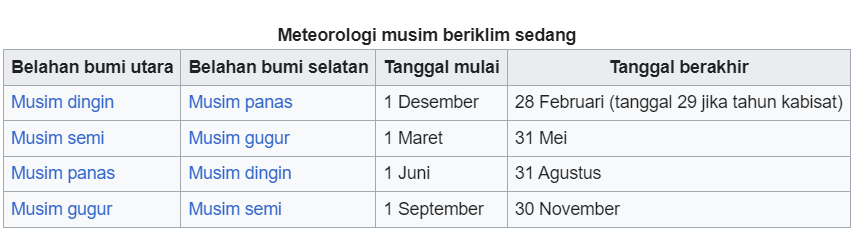

In [ ]:
# Mengonversi kolom 'date' menjadi tipe data datetime
df['date'] = pd.to_datetime(df['date'])

# Ekstraksi bulan dari kolom 'date' dan simpan dalam kolom baru 'Bulan'
df['Month'] = df['date'].dt.month
df

date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
0     2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340   
1     2016-07-01 00:15:00   5.760  2.076  1.492  0.426  4.264  1.401   
2     2016-07-01 00:30:00   5.760  1.942  1.492  0.391  4.234  1.310   
3     2016-07-01 00:45:00   5.760  1.942  1.492  0.426  4.234  1.310   
4     2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371   
...                   ...     ...    ...    ...    ...    ...    ...   
64315 2018-05-01 22:45:00  12.458  1.407  7.889 -0.746  4.843  1.523   
64316 2018-05-01 23:00:00  14.200  1.541  9.310  0.284  4.752  1.249   
64317 2018-05-01 23:15:00  12.659  1.474  7.924 -0.959  4.569  1.310   
64318 2018-05-01 23:30:00  13.329  1.541  8.671 -0.533  4.630  1.371   
64319 2018-05-01 23:45:00  11.588  0.871  7.214 -0.426  4.691  1.310   

       Temperature  Month  
0           30.531      7  
1           30.460      7  
2           30.038      7  
3           27.013      7  
4           27.787      7  
...            ...    ...  
64315       10.622      5  
64316       10.482      5  
64317       10.271      5  
64318       10.341      5  
64319       10.833      5  

[64320 rows x 9 columns]

In [ ]:
import pandas as pd

# Fungsi untuk menentukan musim berdasarkan bulan
def determine_season(Month):
    if Month in [12, 1, 2]:
        return 'Winter'
    elif Month in [3, 4, 5]:
        return 'Spring'
    elif Month in [6, 7, 8]:
        return 'Summer'
    elif Month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Tidak Diketahui'

# Menentukan musim berdasarkan bulan
df_scaled['Seasons'] = df['Month'].apply(determine_season)
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0     2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1     2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2     2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3     2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4     2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...          ...       ...       ...       ...       ...       ...       ...   
64315 2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319 2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  hour Time Period  \
0           30.531  00:00:00  2016    07  01     0     Morning   
1           30.460  00:15:00  2016    07  01     0     Morning   
2           30.038  00:30:00  2016    07  01     0     Morning   
3           27.013  00:45:00  2016    07  01     0     Morning   
4           27.787  01:00:00  2016    07  01     1     Morning   
...            ...       ...   ...   ...  ..   ...         ...   
64315       10.622  22:45:00  2018    05  01    22       Night   
64316       10.482  23:00:00  2018    05  01    23       Night   
64317       10.271  23:15:00  2018    05  01    23       Night   
64318       10.341  23:30:00  2018    05  01    23       Night   
64319       10.833  23:45:00  2018    05  01    23       Night   

       Extreme Weather Seasons  
0                    0  Summer  
1                    0  Summer  
2                    0  Summer  
3                    0  Summer  
4                    0  Summer  
...                ...     ...  
64315                0  Spring  
64316                1  Spring  
64317                1  Spring  
64318                1  Spring  
64319                0  Spring  

[64320 rows x 16 columns]

In [ ]:
kategori_musim = pd.pivot_table(df_scaled, index='Seasons', aggfunc='size')
kategori_musim = kategori_musim.reset_index(name='Jumlah')
kategori_musim

Seasons  Jumlah
0  Autumn   17472
1  Spring   14784
2  Summer   14784
3  Winter   17280

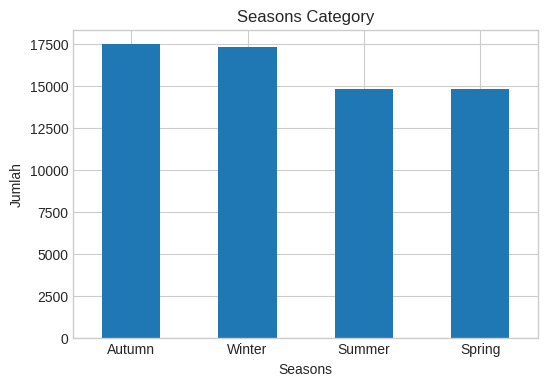

In [ ]:
# Menghitung jumlah data untuk setiap kategori musim
jumlah_musim = df_scaled['Seasons'].value_counts()

# Plot bar plot
plt.figure(figsize=(6, 4))
jumlah_musim.plot(kind='bar')
plt.title('Seasons Category')
plt.xlabel('Seasons')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

_Data ini kami dapatkan dari patokan belahan bumi Utara dan didapatkan bahwa musim gugur paling banyak terjadi._

##Kategori Kecepatan Angin

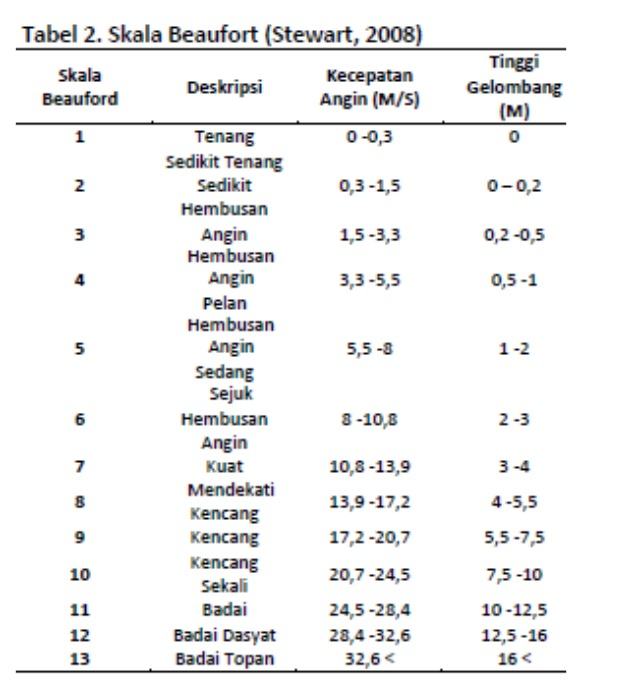

In [ ]:
import pandas as pd

# Mengubah tipe data kolom 'Iws' menjadi float
df_scaled['Iws'] = df_scaled['Iws'].astype(float)

# Fungsi untuk mengkategorikan kecepatan angin berdasarkan Skala Beaufort
def kategori_kecepatan_angin(Iws):
    if Iws < 0.28:
        return 'Calm'
    elif Iws > 0.28 and Iws <= 5.28:
        return 'Gentle breeze'
    elif Iws > 5.28 and Iws <= 8:
        return 'Moderate breeze'
    elif Iws > 8 and Iws <= 10.8:
        return 'Cool'
    elif Iws > 10.8 and Iws <= 13.9:
        return 'Strong breeze'
    elif Iws > 13.9 and Iws <= 20.7:
        return 'Gale'
    elif Iws > 20.7 and Iws <= 24.5:
        return 'Strong Gale'
    elif Iws > 24.5 and Iws <= 28.4:
        return 'Storm'
    elif Iws > 28.4 and Iws <= 32.6:
        return 'Violent Storm'
    elif Iws > 32.6:
        return 'Hurricane'
    else:
        return 'Anomaly'
# Menerapkan fungsi kategori_kecepatan_angin ke kolom 'Iws'
df_scaled['Wind Speed Category'] = df['Iws'].apply(kategori_kecepatan_angin)
df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0     2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1     2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2     2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3     2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4     2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...          ...       ...       ...       ...       ...       ...       ...   
64315 2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319 2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  hour Time Period  \
0           30.531  00:00:00  2016    07  01     0     Morning   
1           30.460  00:15:00  2016    07  01     0     Morning   
2           30.038  00:30:00  2016    07  01     0     Morning   
3           27.013  00:45:00  2016    07  01     0     Morning   
4           27.787  01:00:00  2016    07  01     1     Morning   
...            ...       ...   ...   ...  ..   ...         ...   
64315       10.622  22:45:00  2018    05  01    22       Night   
64316       10.482  23:00:00  2018    05  01    23       Night   
64317       10.271  23:15:00  2018    05  01    23       Night   
64318       10.341  23:30:00  2018    05  01    23       Night   
64319       10.833  23:45:00  2018    05  01    23       Night   

       Extreme Weather Seasons Wind Speed Category  
0                    0  Summer     Moderate breeze  
1                    0  Summer     Moderate breeze  
2                    0  Summer     Moderate breeze  
3                    0  Summer     Moderate breeze  
4                    0  Summer     Moderate breeze  
...                ...     ...                 ...  
64315                0  Spring       Strong breeze  
64316                1  Spring                Gale  
64317                1  Spring       Strong breeze  
64318                1  Spring       Strong breeze  
64319                0  Spring       Strong breeze  

[64320 rows x 17 columns]

In [ ]:
total_per_kategori = df_scaled['Wind Speed Category'].value_counts()
total_per_kategori

Wind Speed Category
Cool               16238
Strong breeze      13335
Moderate breeze    13217
Calm                8613
Gale                7326
Gentle breeze       5379
Strong Gale          212
Name: count, dtype: int64

*Ternyata, kecepatan angin paling banyak adalah mendekati kuat. Untungnya belum ada yang sampai di tahap badai, tetapi kategori mendekati kuat ini sudah hampir termasuk cuaca ekstrim, sehingga perlu melakukan penyebaran informasi terkait peringatan-peringatan tentang kondisi alam agar masyarakat selalu siaga.*

#**HEATMAP CORRELATION**

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_scaled['Time Period'] = label_encoder.fit_transform(df_scaled['Time Period'])
df_scaled['Seasons'] = label_encoder.fit_transform(df_scaled['Seasons'])
df_scaled['Wind Speed Category'] = label_encoder.fit_transform(df_scaled['Wind Speed Category'])

df_scaled

date       Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
0     2016-07-01  0.598824  0.481134  0.608110  0.468044  0.556577  0.613765   
1     2016-07-01  0.597359  0.485320  0.605567  0.465453  0.562874  0.627575   
2     2016-07-01  0.597359  0.476949  0.605567  0.462934  0.559777  0.606973   
3     2016-07-01  0.597359  0.476949  0.605567  0.465453  0.559777  0.606973   
4     2016-07-01  0.595895  0.485320  0.605567  0.465453  0.550279  0.620783   
...          ...       ...       ...       ...       ...       ...       ...   
64315 2018-05-01  0.743770  0.443528  0.757612  0.381100  0.622651  0.655196   
64316 2018-05-01  0.781848  0.451899  0.791386  0.455232  0.613256  0.593163   
64317 2018-05-01  0.748164  0.447714  0.758444  0.365769  0.594363  0.606973   
64318 2018-05-01  0.762809  0.451899  0.776199  0.396430  0.600661  0.620783   
64319 2018-05-01  0.724753  0.410045  0.741568  0.404131  0.606958  0.606973   

       Temperature      time  year month day  hour  Time Period  \
0           30.531  00:00:00  2016    07  01     0            2   
1           30.460  00:15:00  2016    07  01     0            2   
2           30.038  00:30:00  2016    07  01     0            2   
3           27.013  00:45:00  2016    07  01     0            2   
4           27.787  01:00:00  2016    07  01     1            2   
...            ...       ...   ...   ...  ..   ...          ...   
64315       10.622  22:45:00  2018    05  01    22            3   
64316       10.482  23:00:00  2018    05  01    23            3   
64317       10.271  23:15:00  2018    05  01    23            3   
64318       10.341  23:30:00  2018    05  01    23            3   
64319       10.833  23:45:00  2018    05  01    23            3   

       Extreme Weather  Seasons  Wind Speed Category  
0                    0        2                    4  
1                    0        2                    4  
2                    0        2                    4  
3                    0        2                    4  
4                    0        2                    4  
...                ...      ...                  ...  
64315                0        1                    6  
64316                1        1                    2  
64317                1        1                    6  
64318                1        1                    6  
64319                0        1                    6  

[64320 rows x 17 columns]

_Label Encoding digunakan dengan tujuan untuk melihat korelasi antara variabel kategori dan variabel target dalam sebuah dataset. Dengan mengonversi nilai-nilai kategori menjadi angka, Label Encoding mempermudah proses analisis statistik dan pemodelan prediktif sehingga memungkinkan untuk mengidentifikasi dan memahami hubungan atau pengaruh variabel kategori terhadap variabel target._

##Heatmap Correlation

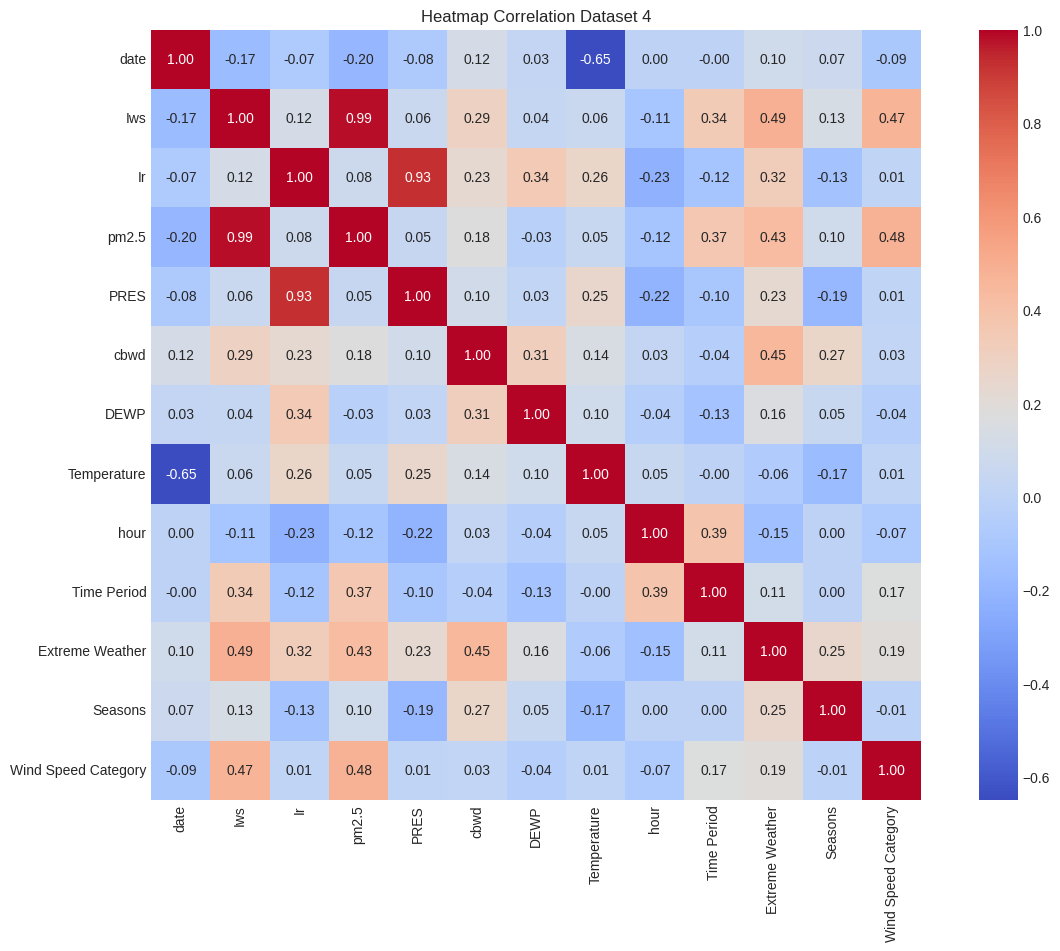

In [ ]:
df_scaled = df_scaled.select_dtypes(exclude=['object']) # Kolom yang object dihapus
corr = df_scaled.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap Correlation Dataset 4')
plt.show()

_Heatmap Correlation bertujuan untuk memvisualisasikan tingkat hubungan (korelasi) antara variabel-variabel dalam sebuah dataset. Selain itu, heatmap bisa melihat apakah dataset kita terdapat multikoliniearitas atau tidak._

_Dari sini, dapat kita lihat bahwa variabel Iws dengan pm2.5 memiliki tingkat korelasi yang tinggi, yaitu 0.99 yang membuktikan bahwa kedua variabel tersebut saling mempengaruhi satu sama lain. Oleh karena itu, kita harus membuang salah satu variabelnya. Berhubung di anatara kedua variabel tersebut yang memiliki tingkat korelasi yang lebih tinggi dengan variabel target (Temperature) adalaah variabel Iws (0.06) sedangkan pm2.5 hanya 0.05, maka variabel pm2.5 dapat kita hapus/hilangkan._

_Hal tersebut juga berlaku di variabel independen yang memiiliki tingkat korelasi tinggi, seperti Ir dengan PRES, dsb sehingga didapatkan variabale independen yang telah di selection adalah Iws, Ir, cbwd, DEWP, hour, time period, seasons, dan wind speed category._




#**MACHINE LEARNING**

## Kalman Filter

Kalman Filter merupakan salah satu algoritma yang menggunakan pengukuran yang diamati dari waktu ke waktu, termasuk noise dan ketidakakuratan data lainnya.

Alasan memilih algoritma Kalman Filter :
- Dataset ini mengandung cukup banyak outlier, yang mana Kalman Filter merupakan salah satu algoritma yang cukup tahan dengan outlier.
- Cocok untuk kondisi dinamis dan memiliki banyak informasi yang tidak pasti
- Algoritma ini juga dianggap ideal digunakan dalam sistem yang berubah terus-menerus dalam kondisi dinamis, sehingga sangat memungkinkan untuk melakukan prediksi suhu di masa yang akan datang (bukan rentang waktu yang jauh)

Akan tetapi, ternyata untuk dapat menggunakan Kalman Filter juga perlu pemahaman tentang dataset yang sedang dikerjakan.

Beberapa sumber rujukan Kalman Filter :
- H.A Sidharta. 2019. *Kalman Filter -Sebuah Algoritma Untuk Mengkombinasikan Berbagai Macam Data Sensor*. Diakses melalui https://binus.ac.id/malang/2019/01/kalman-filter-sebuah-algoritma-untuk-mengkombinasikan-berbagai-macam-data-sensor/ pada 18 Mei 2024

- B.A Tengger dan Ropiudin. 2019. *Pemanfaatan Metode Kalman Filter Diskrit untuk Menduga Suhu Udara*. SQUARE : Jurnal of Mathematics and Mathematics Education Vol 1 (2). Diakses melalui https://journal.walisongo.ac.id/index.php/square/article/viewFile/4202/2455#:~:text=Dengan%20demikian%20Kalman%20Filter%20Diskrit,harian%2C%20bulanan%2C%20bahkan%20tahunan pada 18 Mei 2024

- rlabbe. 2018. *Kalman-and-Bayesian-Filters-in-Python*. Diakses melalui https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/08-Designing-Kalman-Filters.ipynb pada 18 Mei 2024

In [ ]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=36c6c75ae1bd725d301629e0461cd01b9f5655cec4c40bb52e9d47e25698f6bb
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [ ]:
import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

###Learning Curve

In [ ]:
pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 4.5 MB/s eta 0:00:00


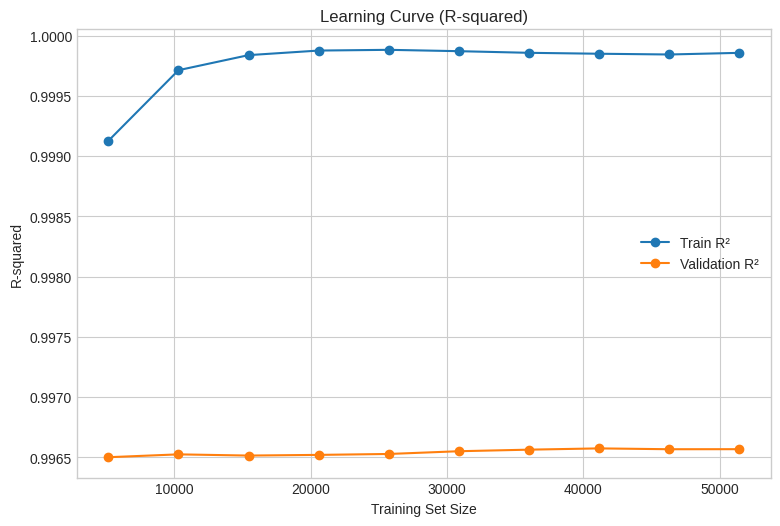

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pykalman import KalmanFilter

X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_trainK = y_trainK.astype(float)
y_testK = y_testK.astype(float)
dim_x = 7
dim_z = 1

# Fungsi untuk menghitung learning curve dan metrik evaluasi
def plot_learning_curve(X_trainK, y_trainK, X_testK, y_testK, train_sizes):
    train_scores_r2 = []
    test_scores_r2 = []
    train_scores_mse = []
    test_scores_mse = []
    train_scores_mae = []
    test_scores_mae = []
    train_scores_rmse = []
    test_scores_rmse = []
    train_scores_mad = []
    test_scores_mad = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_trainK_subset = X_trainK[:train_size]
        y_trainK_subset = y_trainK[:train_size]

        # Inisialisasi Kalman Filter
        kf = KalmanFilter(n_dim_obs=dim_z, n_dim_state=dim_x)

        # Latih model pada subset
        kf = kf.em(y_trainK_subset, n_iter=10)  # Meningkatkan jumlah iterasi EM
        y_trainK_pred, _ = kf.smooth(y_trainK_subset)
        y_testK_pred, _ = kf.smooth(y_testK)

        # Ambil hanya kolom pertama dari prediksi karena hanya ada satu observasi
        y_trainK_pred = y_trainK_pred[:, 0]
        y_testK_pred = y_testK_pred[:, 0]

        # Hitung metrik evaluasi untuk set train dan set test
        train_r2 = r2_score(y_trainK_subset, y_trainK_pred)
        test_r2 = r2_score(y_testK, y_testK_pred)

        train_mse = mean_squared_error(y_trainK_subset, y_trainK_pred)
        test_mse = mean_squared_error(y_testK, y_testK_pred)

        train_mae = mean_absolute_error(y_trainK_subset, y_trainK_pred)
        test_mae = mean_absolute_error(y_testK, y_testK_pred)

        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)

        train_mad =  median_absolute_error(y_trainK_subset, y_trainK_pred)
        test_mad = median_absolute_error(y_testK, y_testK_pred)

        # Simpan skor
        train_scores_r2.append(train_r2)
        test_scores_r2.append(test_r2)

        train_scores_mse.append(train_mse)
        test_scores_mse.append(test_mse)

        train_scores_mae.append(train_mae)
        test_scores_mae.append(test_mae)

        train_scores_rmse.append(train_rmse)
        test_scores_rmse.append(test_rmse)

        train_scores_mad.append(train_mad)
        test_scores_mad.append(test_mad)

    # Plot learning curve
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(train_sizes, train_scores_r2, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores_r2, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve (R-squared)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Kembalikan nilai metrik
    return {
        'train_scores_r2': train_scores_r2,
        'test_scores_r2': test_scores_r2,
        'train_scores_mse': train_scores_mse,
        'test_scores_mse': test_scores_mse,
        'train_scores_mae': train_scores_mae,
        'test_scores_mae': test_scores_mae,
        'train_scores_rmse': train_scores_rmse,
        'test_scores_rmse': test_scores_rmse,
        'train_scores_mad': train_scores_mad,
        'test_scores_mad': test_scores_mad
    }

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_trainK)
train_sizes = train_sizes.astype(int)

# Plot learning curve dan dapatkan nilai metrik
metrics = plot_learning_curve(X_trainK, y_trainK, X_testK, y_testK, train_sizes)

*Hasil plot learning curve, model kalman filter good fit karena nilai R-squared traing dan testing sama-sama tinggi dan gap nya tidak terlalu tinggi*

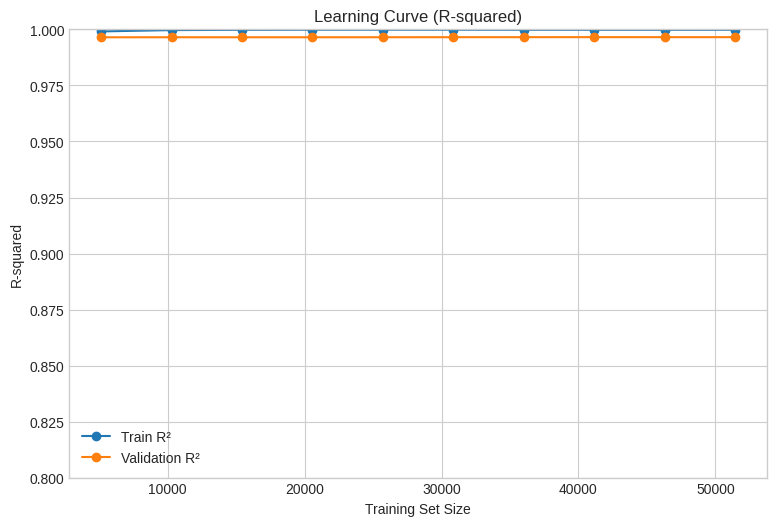

In [ ]:
train_r2 = metrics['train_scores_r2']
test_r2 = metrics['test_scores_r2']

# Plot learning curve
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(train_sizes, train_r2, label='Train R²', marker='o')
plt.plot(train_sizes, test_r2, label='Validation R²', marker='o')

plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve (R-squared)')
plt.legend()
plt.grid(True)

plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()


*Hasil plot learning Curve R-squared model kalman filter tidak mengalami overfiting karena training dan validationnya sama-sama tinggi*

### Grafik Data

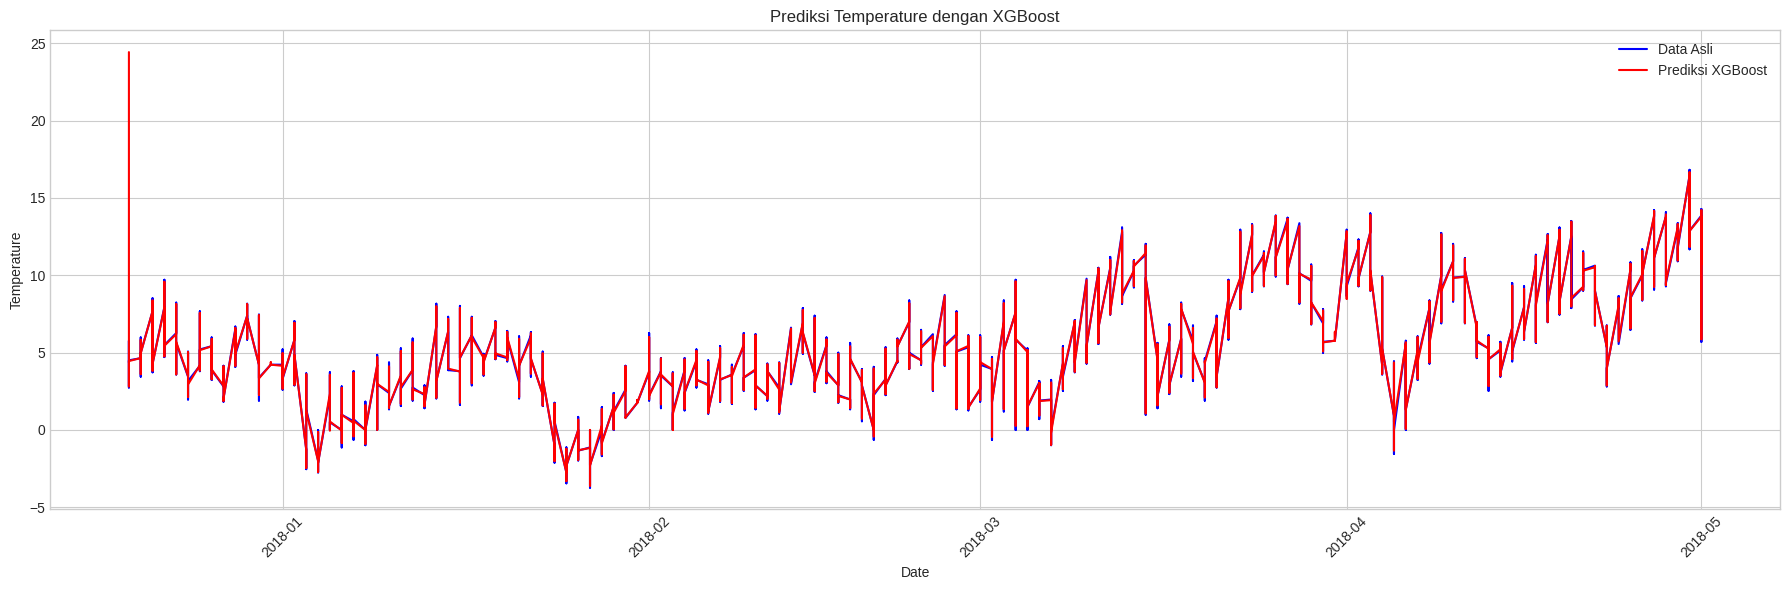

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_testK.copy()
results['Actual'] = y_testK
results['Predicted'] = y_testK_pred
results['date'] = df_scaled.loc[X_testK.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi XGBoost', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan XGBoost')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Matrik Evaluasi

In [ ]:
# Memanggil nilai test_r2
test_mse = metrics['test_scores_mse']
test_mae = metrics['test_scores_mae']
test_rmse = metrics['test_scores_rmse']
test_r2 = metrics['test_scores_r2']
test_mad = metrics['test_scores_mad']

print("Test MSE values:", test_mse)
print("Test MAE values:", test_mae)
print("Test RMSE values:", test_rmse)
print("Test R² values:", test_r2)
print("Test MAD values:", test_mad)

Test MSE values: [0.0423220767363327, 0.04203579380574369, 0.042156321199290865, 0.04208847599768946, 0.041996535835374334, 0.041720822988915274, 0.04156368699428124, 0.04143646644820475, 0.04152101717131129, 0.04151557264913558]
Test MAE values: [0.04821037097569328, 0.048984772152504207, 0.049481639433098974, 0.04968602686274718, 0.049763480086383045, 0.04896839187113349, 0.04854905765861128, 0.04842844421988753, 0.04890741122759449, 0.04933463776730675]
Test RMSE values: [0.20572330139372327, 0.20502632466525778, 0.20532004578046165, 0.20515476108949912, 0.20493056344863333, 0.20425675751101913, 0.2038717415295245, 0.20355949117691552, 0.2037670659633477, 0.2037537058537478]
Test R² values: [0.9964994340332167, 0.9965231132181946, 0.9965131440927535, 0.9965187557409061, 0.9965263603441771, 0.996549165250773, 0.996562162366165, 0.9965726850991737, 0.996565691695102, 0.9965661420252961]
Test MAD values: [0.03505846068786056, 0.0356174842206336, 0.03600923703124814, 0.03614538316962701

In [ ]:
mseKF = test_mse[-1]
maeKF = test_mae[-1]
rmseKF = test_rmse[-1]
r2KF = test_r2[-1]
madKF = test_mad[-1]

# Hitung rentang data
data_range = 20.541

# Scaled Mean Absolute Error (SMAE)
smaeKF = maeKF / data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseKF = rmseKF / data_range

print(f'Mean Squared Error (MSE) : {mseKF}')
print(f'Mean Absolute Error (MAE) : {maeKF}')
print(f'Root Mean Squared Error (RMSE) : {rmseKF}')
print(f'R-squared (R2) : {r2KF}')
print("Median Absolute Error (MAD):", madKF)
print("Scaled Mean Absolute Error (SMAE):", smaeKF)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseKF)

Mean Squared Error (MSE) : 0.04151557264913558
Mean Absolute Error (MAE) : 0.04933463776730675
Root Mean Squared Error (RMSE) : 0.2037537058537478
R-squared (R2) : 0.9965661420252961
Median Absolute Error (MAD): 0.03588401923759088
Scaled Mean Absolute Error (SMAE): 0.0024017641676309207
Normalized Root Mean Squared Error (NRMSE): 0.009919366430735982


*Untuk metric evaluasi, kami fokus terhadap beberapa hasil metric yang robust terhadap outlier, karena data kami mempunyai cukup banyak outlier dalam kasus time series*

1. *Mean Absolute Error (MAE): MAE menghitung rata-rata nilai absolut dari error. Metrik ini tidak terpengaruh oleh outlier sebesar MSE, MAE, dan RMSE.*

2. *Median Absolute Error (MAD): MAD menghitung median nilai absolut dari error. Metrik ini lebih robust terhadap outlier ekstrem dibandingkan ΜΑΕ.*

3. *Scaled Mean Absolute Error (SMAE): SMAE menskalakan MAE dengan rentang data, sehingga memungkinkan perbandingan model pada data dengan skala yang berbeda.*

4. *Normalized Root Mean Squared Error (NRMSE): NRMSE menskalakan RMSE dengan rentang data, sehingga memungkinkan perbandingan model pada data dengan skala yang berbeda.*

*Kesimpulan : Pada model kalman filter nilai keempat metrik evaluasi di atas rendah. Jadi Model Kalman Filter dapat melakukan prediksi dengan akurat

##XGBoost

XGBoost dipilih efektif untuk prediksi data time series berkat kemampuannya menangani non-linearitas, missing values, dan fitur yang kaya

In [ ]:
pip install openpyxl

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import xgboost as xgb

X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_train0 = y_train0.astype(float)
y_test0 = y_test0.astype(float)

# Membuat dan melatih model XGBoost
# Membuat dan melatih model XGBoost dengan subsample dan colsample_bytree ditentukan
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    subsample=1.0,          # Tentukan nilai subsample di sini
    colsample_bytree=1.0   # Tentukan nilai colsample_bytree di sini
)
model.fit(X_train0, y_train0)

# Memprediksi dengan model
y_pred0 = model.predict(X_test0)

print(y_pred0)

[ 4.71988    3.483818   3.0995407 ... 10.1316185  9.377037  12.112171 ]


###Grafik Data

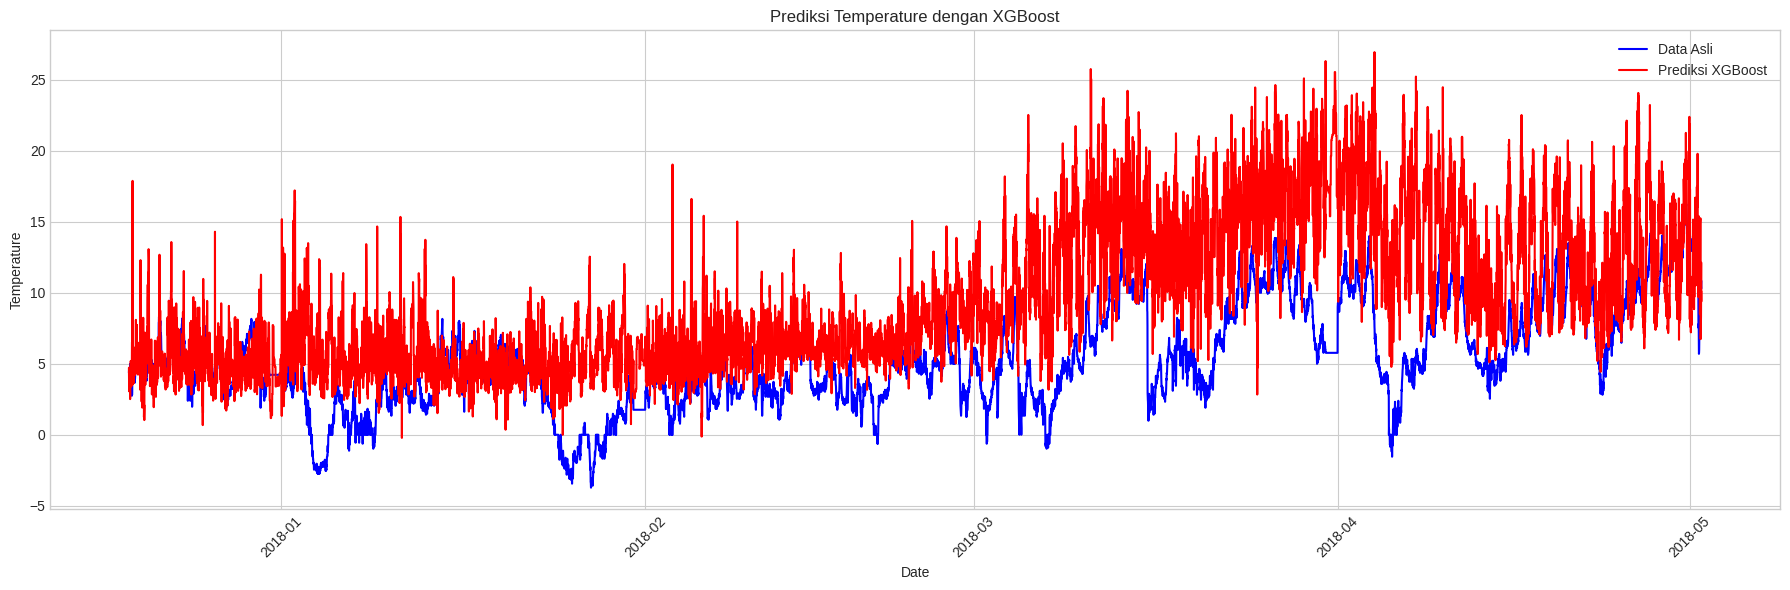

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test0.copy()
results['Actual'] = y_test0
results['Predicted'] = y_pred0
results['date'] = df.loc[X_test0.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi XGBoost', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan XGBoost')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Terlihat kurva hasil prediksi model Xgboost sangat berbeda dengan data asli*

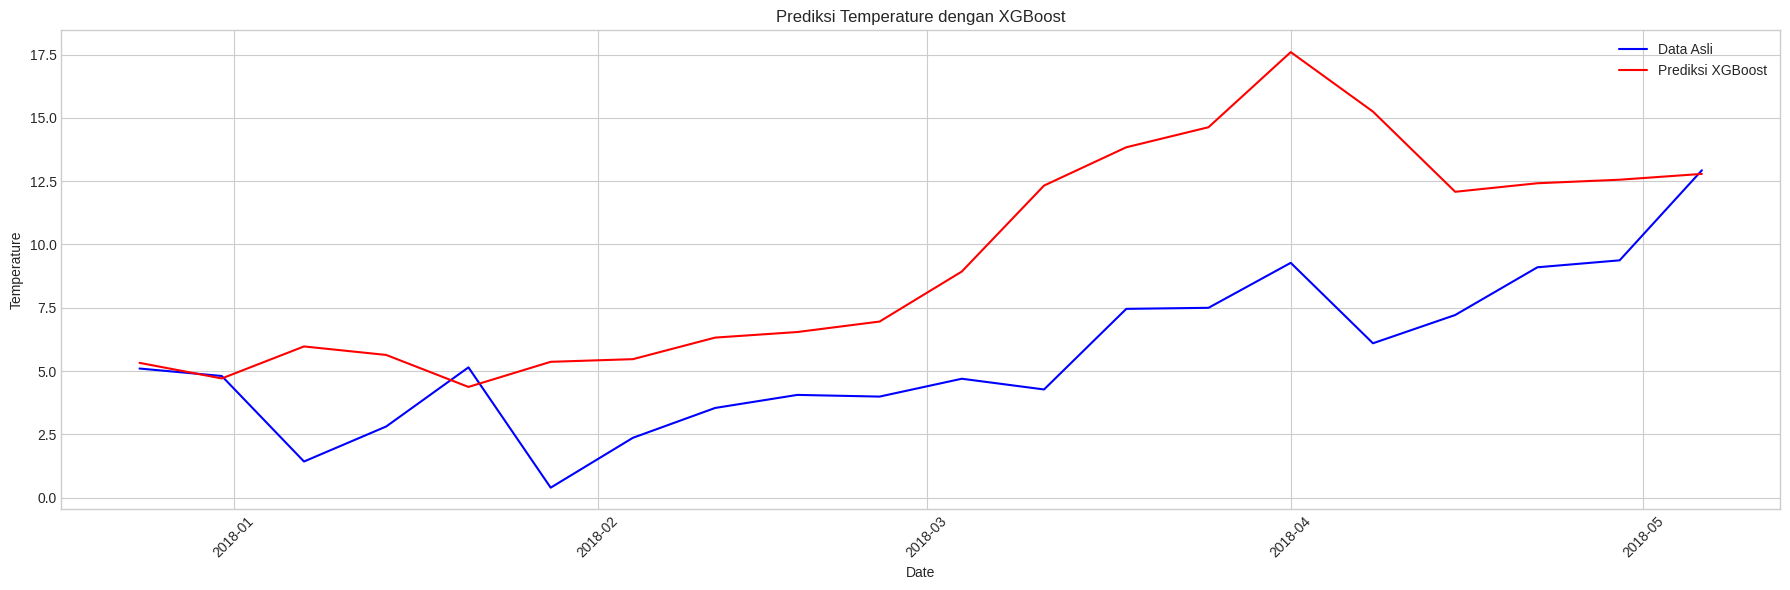

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test0.copy()
results['Actual'] = y_test0
results['Predicted'] = y_pred0
results['date'] = df.loc[X_test0.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Resample data to weekly frequency
weekly_results = results.resample('W').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(weekly_results['date'], weekly_results['Actual'], label='Data Asli', color='blue')
plt.plot(weekly_results['date'], weekly_results['Predicted'], label='Prediksi XGBoost', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan XGBoost')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Learning Curve

Rata-rata gap antara nilai R² pada set pelatihan dan validasi: 15.300872216275883


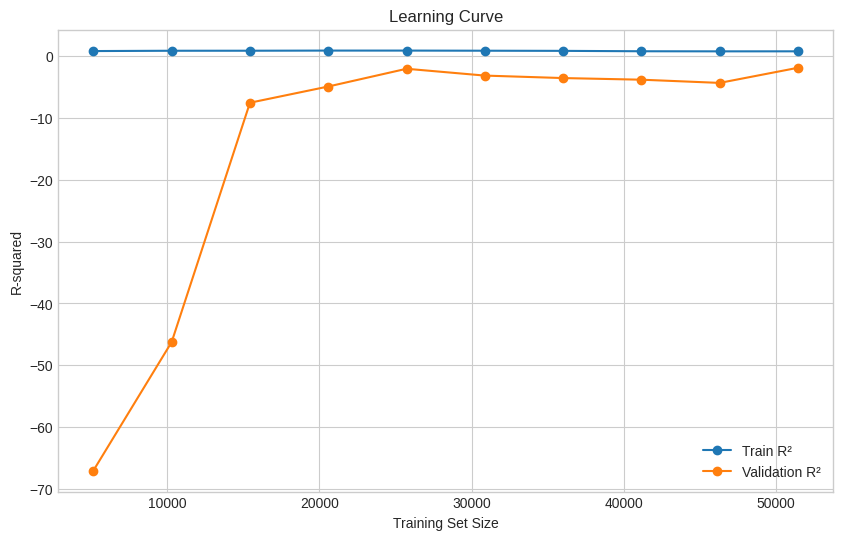

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb

# Membagi dataset menjadi train dan test
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_train0 = y_train0.astype(float)
y_test0 = y_test0.astype(float)

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_train0, y_train0, X_test0, y_test0, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_train0_subset = X_train0[:train_size]
        y_train0_subset = y_train0[:train_size]

        # Latih model pada subset
        model.fit(X_train0_subset, y_train0_subset)

        # Prediksi pada set train dan set test
        y_train0_pred = model.predict(X_train0_subset)
        y_test0_pred = model.predict(X_test0)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_train0_subset, y_train0_pred)
        test_r2 = r2_score(y_test0, y_test0_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train0)
train_sizes = train_sizes.astype(int)

# Inisialisasi model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_train0, y_train0, X_test0, y_test0, train_sizes)

*Learning curve Xgboost menunjukkan kurva good fit karena hasil training dan testing R-squared cukup tinggi dan gap nya tidak terlalu tinggi. Model masih cukup mampu untuk membuat prediksi yang akurat*

###Matriks Evaluasi

In [ ]:
mseXGBoost_ = mean_squared_error(y_test0, y_pred0)
maeXGBoost_ = mean_absolute_error(y_test0, y_pred0)
rmseXGBoost_ = np.sqrt(mseXGBoost_)
madXGBoost_ = median_absolute_error(y_test0, y_pred0)
r2XGBoost_ = r2_score(y_test0, y_pred0)

# Hitung rentang data
data_range = np.max(y_test0) - np.min(y_test0)

# Scaled Mean Absolute Error (SMAE)
smaeXGBoost_ = maeXGBoost_ / data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseXGBoost_ = rmseXGBoost_ / data_range

print(f"Mean Squared Error: {mseXGBoost_}")
print(f"Mean Absolute Error: {maeXGBoost_}")
print(f"Root Mean Squared Error: {rmseXGBoost_}")
print(f"R-squared: {r2XGBoost_}")
print("Median Absolute Error (MAD):", madXGBoost_)
print("Scaled Mean Absolute Error (SMAE):", smaeXGBoost_)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseXGBoost_)

Mean Squared Error: 32.596382075587705
Mean Absolute Error: 4.4909771686257836
Root Mean Squared Error: 5.709324134745522
R-squared: -1.6961291726053331
Median Absolute Error (MAD): 3.6655103378295895
Scaled Mean Absolute Error (SMAE): 0.21863478743127324
Normalized Root Mean Squared Error (NRMSE): 0.2779477208872753


##LightGBM

*LightGBM dipilih karena kuat untuk analisis dan prediksi time series, memberikan keseimbangan yang baik antara performa, fleksibilitas, dan kemampuan untuk menangani kompleksitas data.*

In [ ]:
pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

X = df_scaled.drop(columns=['date','Temperature','pm2.5','PRES','Extreme Weather'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_train_ = y_train_.astype(float)
y_test_ = y_test_.astype(float)

# Membuat dataset LightGBM
train_data = lgb.Dataset(X_train_, label=y_train_)
test_data = lgb.Dataset(X_test_, label=y_test_, reference=train_data)

# Menentukan parameter
params = {
    'objective': 'regression',
    'metric': ['l3', 'mae'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 40
}

# Menyediakan callback untuk early stopping
callbacks = [lgb.early_stopping(stopping_rounds=10)]

# Melatih model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100, callbacks=callbacks)

# Membuat prediksi
y_pred_ = model.predict(X_test_, num_iteration=model.best_iteration)

print(y_pred_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 15.686497
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 5.06408
[ 6.85622929  5.94574568  5.37015247 ... 11.16300015 10.94605244
 11.01491658]


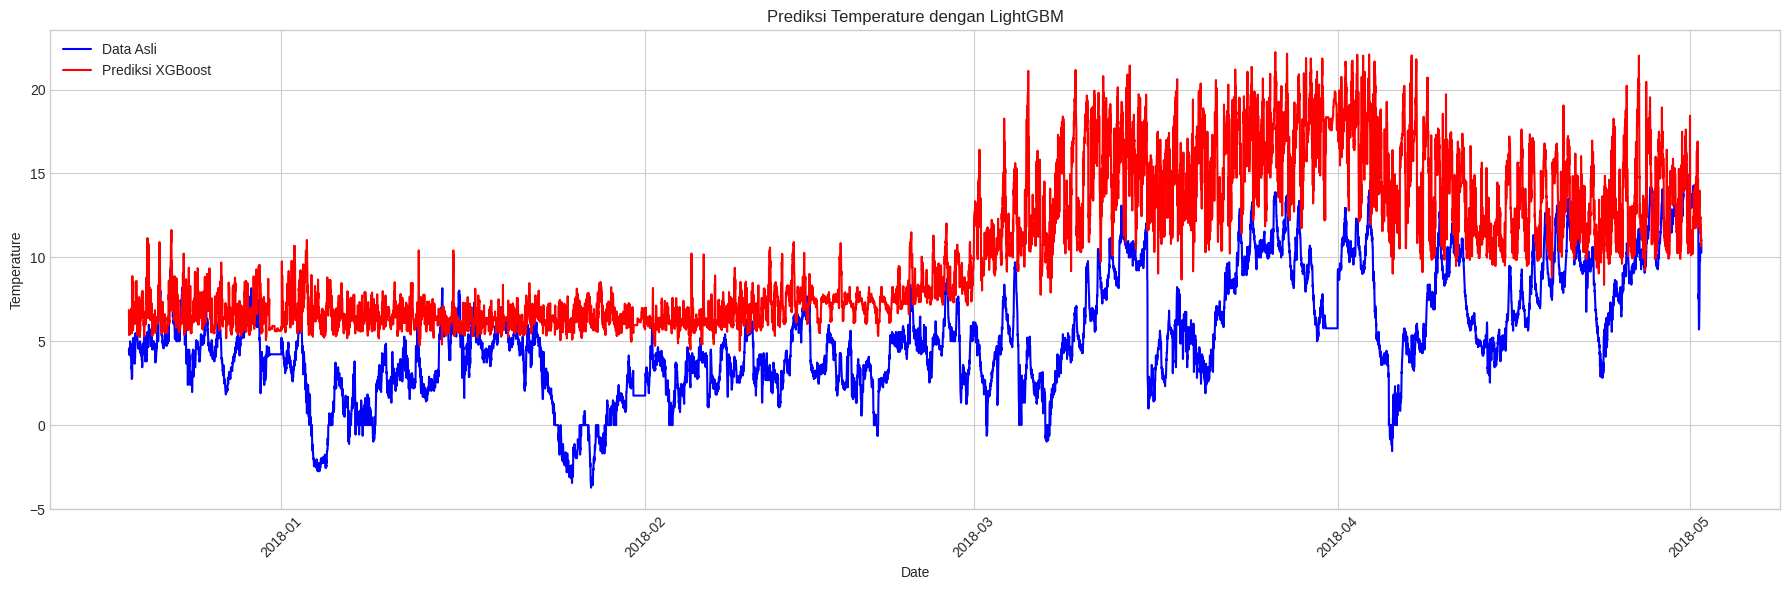

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test_.copy()
results['Actual'] = y_test_
results['Predicted'] = y_pred_
results['date'] = df.loc[X_test_.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi XGBoost', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan LightGBM')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Grafik Data

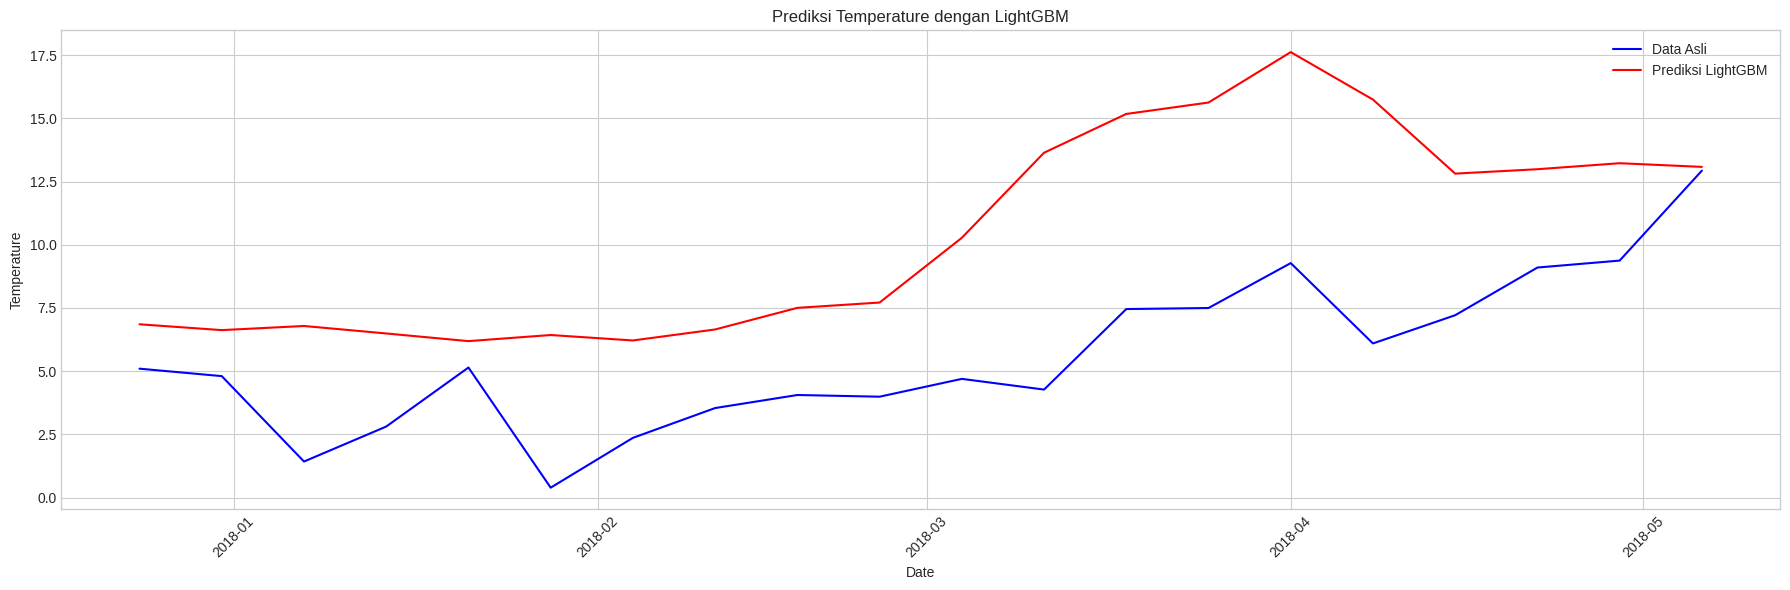

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test_.copy()
results['Actual'] = y_test_
results['Predicted'] = y_pred_
results['date'] = df.loc[X_test_.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Resample data to weekly frequency
weekly_results = results.resample('W').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(weekly_results['date'], weekly_results['Actual'], label='Data Asli', color='blue')
plt.plot(weekly_results['date'], weekly_results['Predicted'], label='Prediksi LightGBM', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan LightGBM')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Hasil grafik prediksi model LightGBM dengan data asli menunjukkan bahwa model ini kurang akurat untuk prediksi*

###Learning Curve

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 5145, number of used features: 7
[LightGBM] [Info] Start training from score 33.331316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

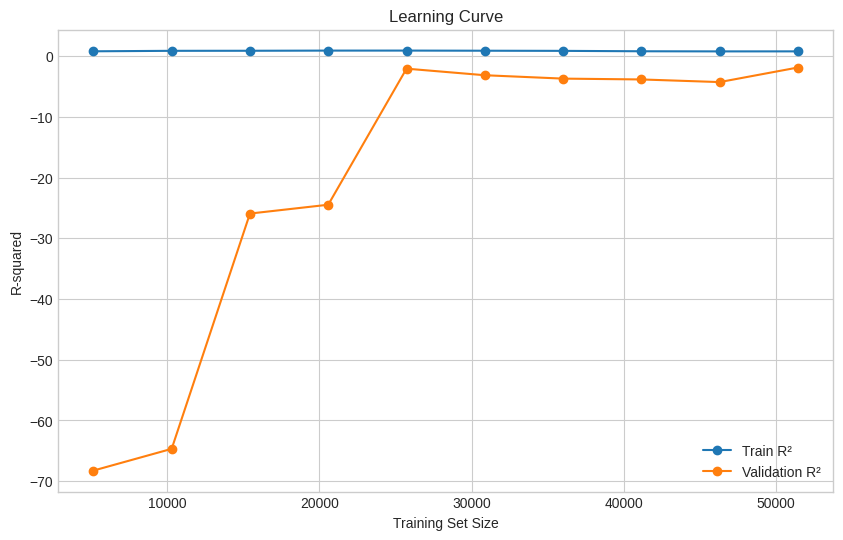

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import lightgbm as lgb

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_train_, y_train_, X_test_, y_test_, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_train_subset = X_train_[:train_size]
        y_train_subset = y_train_[:train_size]

        # Latih model pada subset
        model.fit(X_train_subset, y_train_subset)

        # Prediksi pada set train dan set test
        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test_)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_train_subset, y_train_pred)
        test_r2 = r2_score(y_test_, y_test_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_)
train_sizes = train_sizes.astype(int)

# Inisialisasi model LightGBM
model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=6)

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_train_, y_train_, X_test_, y_test_, train_sizes)

*Dari hasil learning curve, model mengalami underfitting karena hasil grafik R-squared training dan testing sama-sama rendah*

###Matriks Evaluasi

In [ ]:
# Menghitung metrik evaluasi
mseLGBM_ = mean_squared_error(y_test_, y_pred_)
maeLGBM_ = mean_absolute_error(y_test_, y_pred_)
rmseLGBM_ = np.sqrt(mseLGBM_)
madLGBM_ = median_absolute_error(y_test_, y_pred_)
r2LGBM_ = r2_score(y_test_, y_pred_)

# Hitung rentang data
data_range = np.max(y_test_) - np.min(y_test_)

# Scaled Mean Absolute Error (SMAE)
smaeLGBM_ = maeLGBM_ / data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseLGBM_ = rmseLGBM_ / data_range

print(f"Mean Squared Error: {mseLGBM_}")
print(f"Mean Absolute Error: {maeLGBM_}")
print(f"Root Mean Squared Error: {rmseLGBM_}")
print(f"R-squared: {r2LGBM_}")
print("Median Absolute Error (MAD):", madLGBM_)
print("Scaled Mean Absolute Error (SMAE):", smaeLGBM_)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseLGBM_)

Mean Squared Error: 36.849564086127
Mean Absolute Error: 5.064076352568271
Root Mean Squared Error: 6.070384179450836
R-squared: -2.047920609717099
Median Absolute Error (MAD): 4.458241659344779
Scaled Mean Absolute Error (SMAE): 0.24653504467008766
Normalized Root Mean Squared Error (NRMSE): 0.2955252509347566


*Model LightGBM dalam evaluasi ini menunjukkan performa prediksi yang buruk. Tingginya nilai MSE, MAE, RMSE, MAD, SMAE, dan NRMSE, serta nilai R-squared yang negatif, menunjukkan bahwa model tidak mampu menangkap pola dalam data dengan baik dan memberikan prediksi yang akurat. Model ini mungkin memerlukan tuning hyperparameter, penambahan fitur yang relevan, atau pemilihan model yang berbeda untuk meningkatkan akurasi prediksi*

In [ ]:
data_range = np.max(y_test_) - np.min(y_test_)
data_range

20.541

##Gradient Boosting Regression

*Gradient Boosting Regression (GBR) dipilih karena adalah pilihan yang kuat dan fleksibel untuk analisis dan prediksi data time series, memberikan keseimbangan yang baik antara akurasi, interpretabilitas, dan kontrol terhadap overfitting.*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

#Splitting Data
X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather', 'Seasons'])
y = df_scaled['Temperature']

X_trainG, X_testG, y_trainG, y_testG = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Inisiasi dan Training Model
modelgbr2 = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 7, n_estimators = 200)
modelgbr2.fit(X_trainG, y_trainG)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, n_estimators=200)

In [ ]:
#Evaluation Model
y_pred_gbr2 = modelgbr2.predict(X_testG)

###Grafik Data

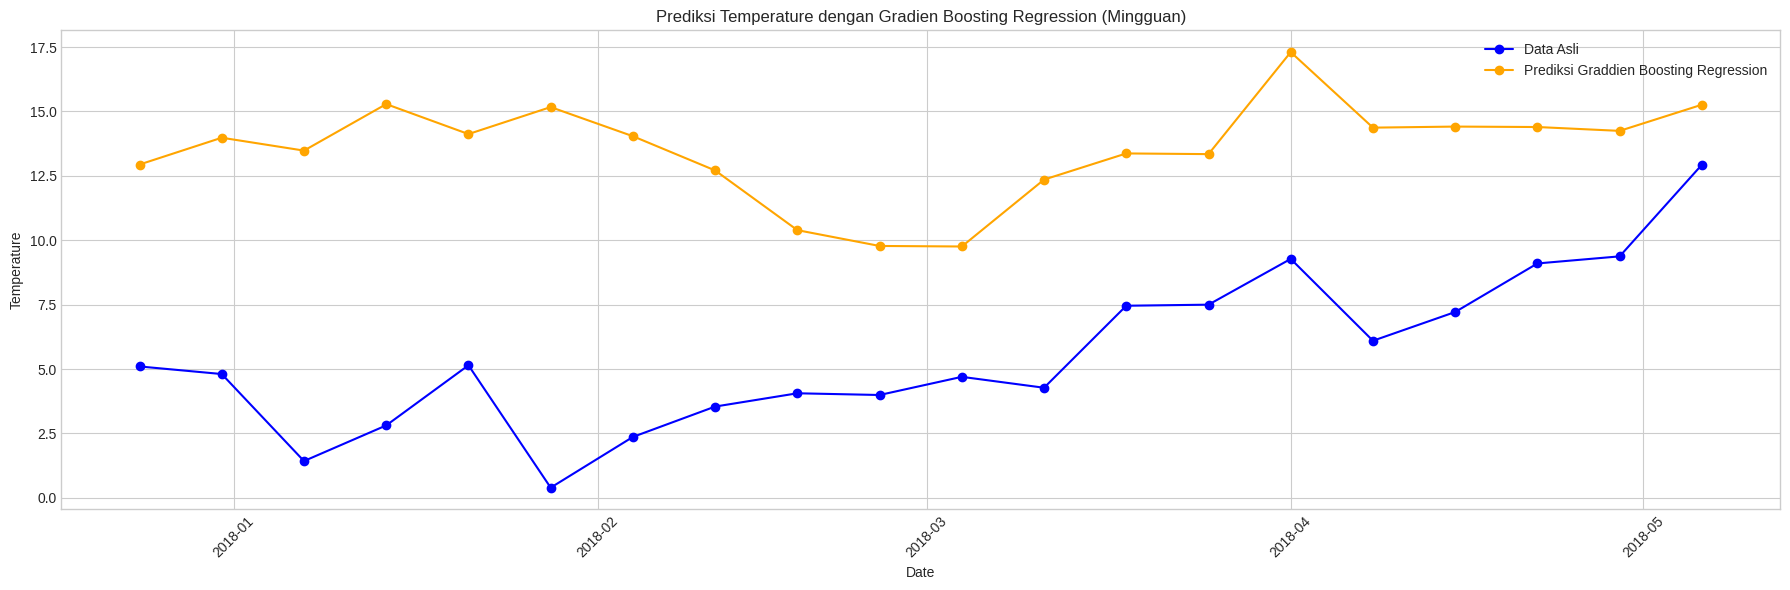

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_testG.copy()
results['Actual'] = y_testG
results['Predicted'] = y_pred_gbr2
results['date'] = df.loc[X_testG.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Resample data to weekly frequency
weekly_results = results.resample('W').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(weekly_results['date'], weekly_results['Actual'], label='Data Asli', color='blue', marker='o')
plt.plot(weekly_results['date'], weekly_results['Predicted'], label='Prediksi Graddien Boosting Regression', color='orange', marker='o')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Gradien Boosting Regression (Mingguan)')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Learning Curve

Rata-rata gap antara nilai R² pada set pelatihan dan validasi: 24.500645339156147


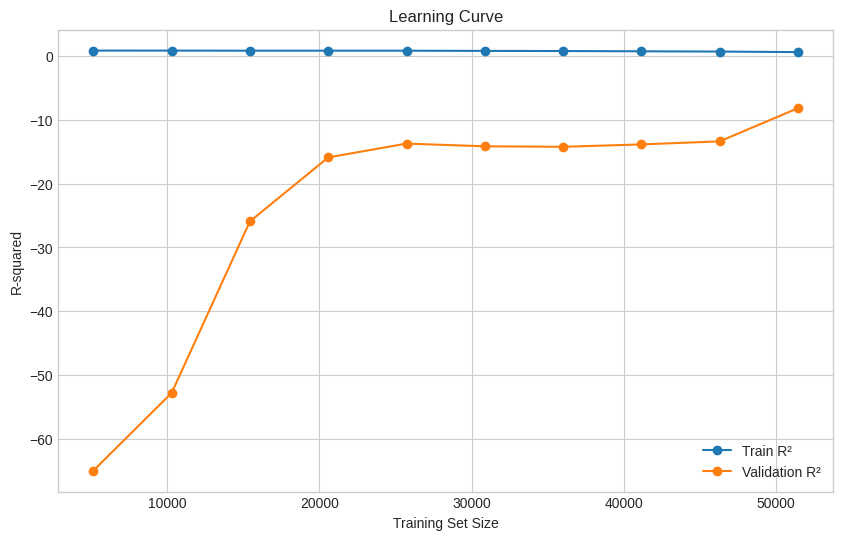

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_trainG, y_trainG, X_testG, y_testG, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_train_subset = X_trainG[:train_size]
        y_train_subset = y_trainG[:train_size]

        # Latih model pada subset
        model.fit(X_train_subset, y_train_subset)

        # Prediksi pada set train dan set test
        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_testG)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_train_subset, y_train_pred)
        test_r2 = r2_score(y_testG, y_test_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_trainG)
train_sizes = train_sizes.astype(int)

# Inisialisasi model Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_trainG, y_trainG, X_testG, y_testG, train_sizes)

*Hasil learning curve GBR menunjukkan kurva good fit, yang mana hasil training dan testing R-squared tidak memiliki gap yang tinggi dan nilai R-squared tergolong tinggi.*

###Matriks Evaluasi

In [ ]:
#Metric Evaluation
msegbr2 = mean_squared_error(y_testG, y_pred_gbr2)
maegbr2 = mean_absolute_error(y_testG, y_pred_gbr2)
rmsegbr2 = np.sqrt(msegbr2)
madgbr2= median_absolute_error(y_testG, y_pred_gbr2)
r2gbr2 = r2_score(y_testG, y_pred_gbr2)

# Hitung rentang data
data_range = np.max(y_testG) - np.min(y_testG)

# Scaled Mean Absolute Error (SMAE)
smaegbr2= maegbr2/ data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmsegbr2= rmsegbr2/ data_range

print(f"Mean Squared Error: {msegbr2}")
print(f"Mean Absolute Error: {maegbr2}")
print(f"Root Mean Squared Error: {rmsegbr2}")
print(f"R-squared: {r2gbr2}")
print("Median Absolute Error (MAD):", madgbr2)
print("Scaled Mean gbr2solute Error (SMAE):", smaegbr2)
print("Normalized Root Mean Squared Error (NRMSE):", nrmsegbr2)

Mean Squared Error: 100.4414723775921
Mean Absolute Error: 8.246214377403428
Root Mean Squared Error: 10.022049310275424
R-squared: -7.307768119440178
Median Absolute Error (MAD): 7.16188994799677
Scaled Mean gbr2solute Error (SMAE): 0.4014514569594191
Normalized Root Mean Squared Error (NRMSE): 0.4879046448700367


*Model Gradient Boosting Regression (GBR) dalam evaluasi ini menunjukkan performa prediksi yang sangat buruk. Tingginya nilai MSE, MAE, RMSE, MAD, SMAE, dan NRMSE, serta nilai R-squared yang sangat negatif, menunjukkan bahwa model tidak mampu menangkap pola dalam data dengan baik dan memberikan prediksi yang akurat. Model ini mungkin memerlukan tuning hyperparameter, penambahan fitur yang relevan, atau pemilihan model yang berbeda untuk meningkatkan akurasi prediksi*

##AdaBoost Regression

*AdaBoost Regression dipilih untuk analisis dan prediksi data time series. Model ini menawarkan keseimbangan antara akurasi, fleksibilitas, dan kemampuan untuk menangani kompleksitas data time series, menjadikannya alat yang berguna untuk berbagai aplikasi forecasting.*

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

X = df_scaled.drop(columns=['date','Temperature','pm2.5','PRES','Extreme Weather'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_train2 = y_train2.astype(float)
y_test2 = y_test2.astype(float)

# Inisialisasi model dasar untuk AdaBoost
base_estimator = DecisionTreeRegressor(max_depth=3)

# Inisialisasi model AdaBoost untuk regresi
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Latih model dengan data training
adaboost_model.fit(X_train2, y_train2)

# Lakukan prediksi pada data testing
y_pred2 = adaboost_model.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Grafik Data

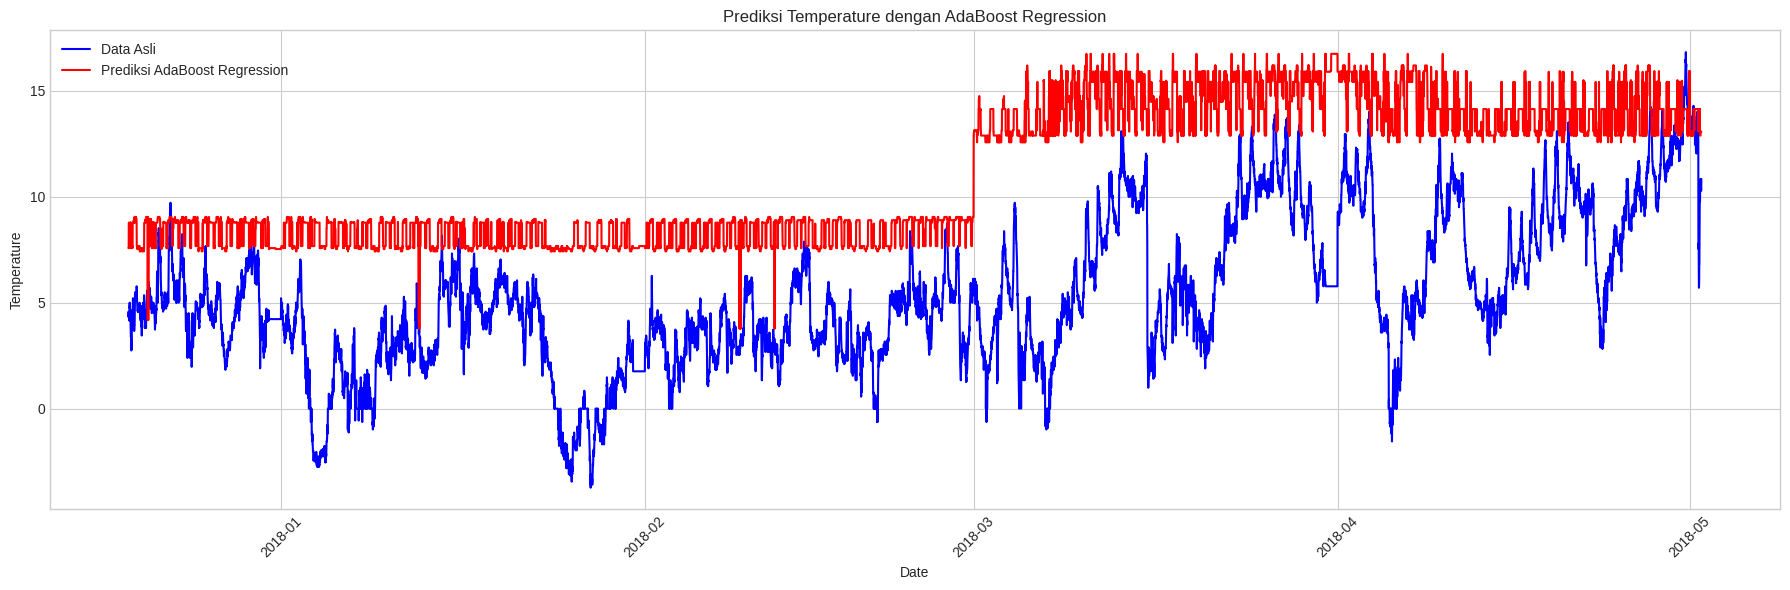

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test2.copy()
results['Actual'] = y_test2
results['Predicted'] = y_pred2
results['date'] = df.loc[X_test2.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi AdaBoost Regression', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan AdaBoost Regression')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

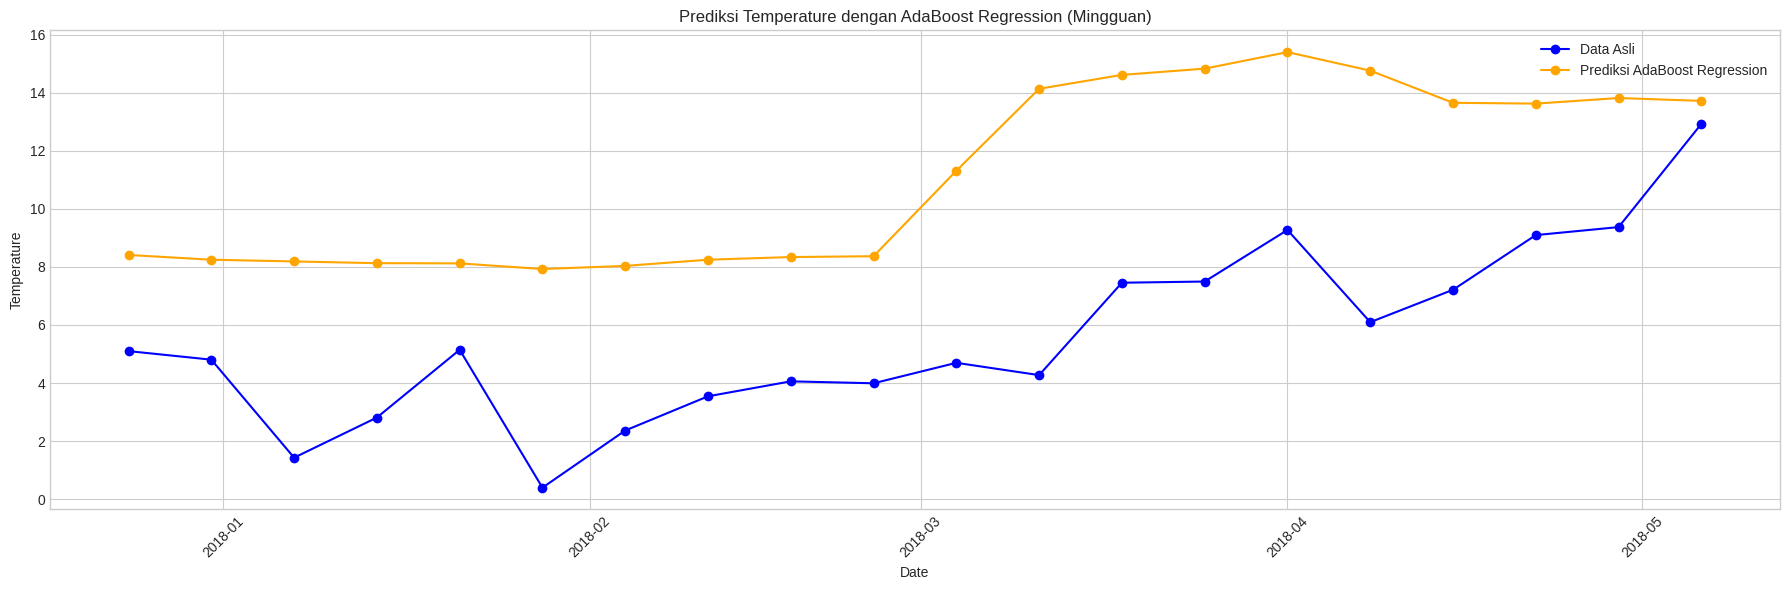

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test2.copy()
results['Actual'] = y_test2
results['Predicted'] = y_pred2
results['date'] = df.loc[X_test2.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Resample data to weekly frequency
weekly_results = results.resample('W').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(weekly_results['date'], weekly_results['Actual'], label='Data Asli', color='blue', marker='o')
plt.plot(weekly_results['date'], weekly_results['Predicted'], label='Prediksi AdaBoost Regression', color='orange', marker='o')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan AdaBoost Regression (Mingguan)')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Learning Curve

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Rata-rata gap antara nilai R² pada set pelatihan dan validasi: 15.106923657544687


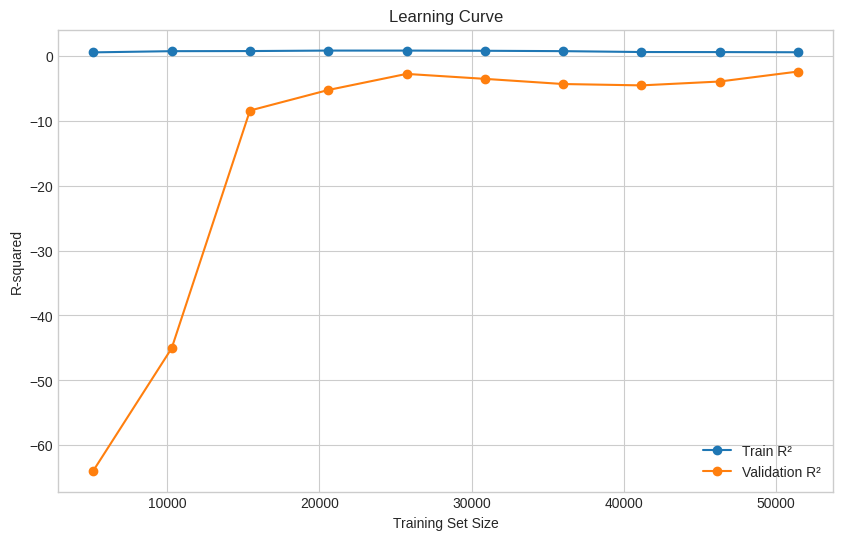

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_train2, y_train2, X_test2, y_test2, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_train2_subset = X_train2[:train_size]
        y_train2_subset = y_train2[:train_size]

        # Latih model pada subset
        model.fit(X_train2_subset, y_train2_subset)

        # Prediksi pada set train dan set test
        y_train2_pred = model.predict(X_train2_subset)
        y_test2_pred = model.predict(X_test2)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_train2_subset, y_train2_pred)
        test_r2 = r2_score(y_test2, y_test2_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train2)
train_sizes = train_sizes.astype(int)

# Inisialisasi model Gradient Boosting Regressor
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_train2, y_train2, X_test2, y_test2, train_sizes)

*Dari hasil learning curve adaboost, model ini memili kurva underfitting meskipun gap nya tidak terlalu tinggi karna nilai R-squared training dan testing memiliki nilai yang kecil*

### Matriks Evaluasi

In [ ]:
# Menghitung metrik evaluasi
mseAB = mean_squared_error(y_test2, y_pred2)
maeAB = mean_absolute_error(y_test2, y_pred2)
rmseAB = np.sqrt(mseAB)
madAB = median_absolute_error(y_test2, y_pred2)
r2AB = r2_score(y_test2, y_pred2)

# Hitung rentang data
data_range = np.max(y_test2) - np.min(y_test2)

# Scaled Mean Absolute Error (SMAE)
smaeAB = maeAB / data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseAB = rmseAB / data_range

print(f"Mean Squared Error: {mseAB}")
print(f"Mean Absolute Error: {maeAB}")
print(f"Root Mean Squared Error: {rmseAB}")
print(f"R-squared: {r2AB}")
print("Median Absolute Error (MAD):", madAB)
print("Scaled Mean Absolute Error (SMAE):", smaeAB)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseAB)

Mean Squared Error: 41.42131404971551
Mean Absolute Error: 5.724613880306412
Root Mean Squared Error: 6.4359392515557134
R-squared: -2.426061607638449
Median Absolute Error (MAD): 5.26329010238913
Scaled Mean Absolute Error (SMAE): 0.27869207342906444
Normalized Root Mean Squared Error (NRMSE): 0.31332161294755434


*Model AdaBoost dalam evaluasi ini menunjukkan performa prediksi yang kurang memuaskan. Tingginya nilai MSE, MAE, RMSE, MAD, SMAE, dan NRMSE, menunjukkan bahwa model tidak mampu menangkap pola dalam data dengan baik dan memberikan prediksi yang akurat.*

## Lasso Regression

*Pemilihan model Lasso Regression karena kemampuan regulasinya untuk mencegah overfitting, seleksi fitur otomatis, efisiensi komputasi, dan kemampuannya untuk menghasilkan model yang stabil dan interpretatif. Model ini cocok untuk data time series yang kompleks dengan banyak variabel atau lag, dan membantu meningkatkan akurasi prediksi dengan menjaga model tetap sederhana dan fokus pada fitur yang paling relevan

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather', 'Seasons'])
y = df_scaled['Temperature']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

# Inisialisasi model Lasso
lasso_model = Lasso(alpha=0.01)  # Atur nilai alpha sesuai kebutuhan

# Latih model pada data latih
lasso_model.fit(X_train, y_train)

# Prediksi nilai suhu pada data uji
y_pred = lasso_model.predict(X_test)

###Grafik Data

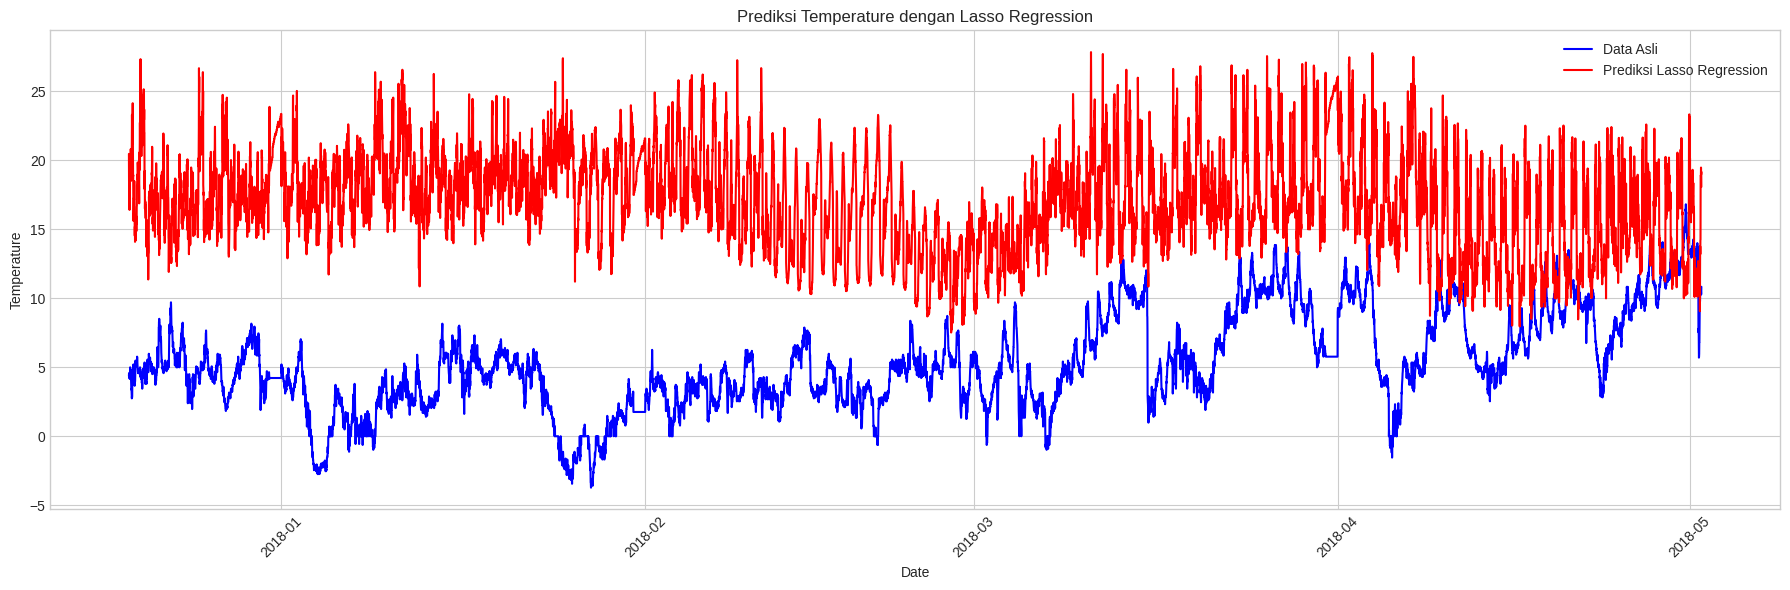

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_test_.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
results['date'] = df.loc[X_test.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi Lasso Regression', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Lasso Regression')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Learning Curve

Rata-rata gap antara nilai R² pada set pelatihan dan validasi: 24.955861537226962


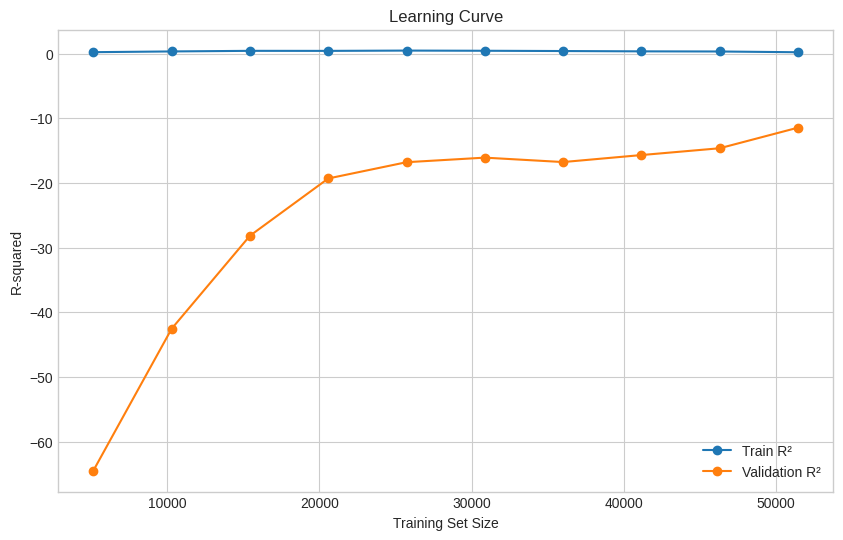

In [ ]:
from sklearn.linear_model import Lasso

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_train, y_train, X_test, y_test, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        # Latih model pada subset
        model.fit(X_train_subset, y_train_subset)

        # Prediksi pada set train dan set test
        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_train_subset, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_)
train_sizes = train_sizes.astype(int)

# Inisialisasi model Lasso
model = Lasso(alpha=0.1)  # Sesuaikan alpha sesuai kebutuhan

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_train, y_train, X_test, y_test, train_sizes)


*Dari hasil learning curve, model Lasso mengalami underfitting karena hasil training dan testing R-squared sangat rendah dan gap yang tinggi*

###Matriks Evaluasi

In [ ]:
# Menghitung metrik evaluasi
mseL = mean_squared_error(y_test, y_pred)
maeL = mean_absolute_error(y_test, y_pred)
rmseL = np.sqrt(mseL)
madL = median_absolute_error(y_test, y_pred)
r2L = r2_score(y_test2, y_pred)

# Hitung rentang data
data_range = np.max(y_test) - np.min(y_test)

# Scaled Mean absolute Error (SMAE)
smaeL = maeL / data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseL = rmseL / data_range

print(f"Mean Squared Error: {mseL}")
print(f"Mean Absolute Error: {maeL}")
print(f"Root Mean Squared Error: {rmseL}")
print(f"R-squared: {r2L}")
print("Median Lsolute Error (MAD):", madL)
print("Scaled Mean Absolute Error (SMAE):", smaeL)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseL)

Mean Squared Error: 167.84477849566346
Mean Absolute Error: 11.82210910019903
Root Mean Squared Error: 12.955492213561918
R-squared: -12.882865979490132
Median Lsolute Error (MAD): 12.055063477313544
Scaled Mean Absolute Error (SMAE): 0.575537174441314
Normalized Root Mean Squared Error (NRMSE): 0.6307138023251992


*Model Lasso memiliki nilai metrik evaluasi yang buruk terlihat dari Nilai MAE, MAD, SMAE, NRMSE yang tinggi*

##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather', 'Seasons'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_trainRR, X_testRR, y_trainRR, y_testRR = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_trainRR = y_trainRR.astype(float)
y_testRR = y_testRR.astype(float)

# Inisialisasi model regresi Ridge
ridge_model = Ridge(alpha=1.0)  # Atur alpha sesuai kebutuhan Anda

# Fit model ke data training
ridge_model.fit(X_trainRR, y_trainRR)  # Pastikan X_trainRR adalah matriks fitur dan y_trainRR adalah target

# Lakukan prediksi untuk data test
y_predRR = ridge_model.predict(X_testRR)  # Pastikan X_testRR adalah matriks fitur dari data test
y_predRR

array([20.6697638 , 18.5632378 , 18.61688495, ..., 18.96785205,
       19.18295893, 18.04540926])

### Grafik Data

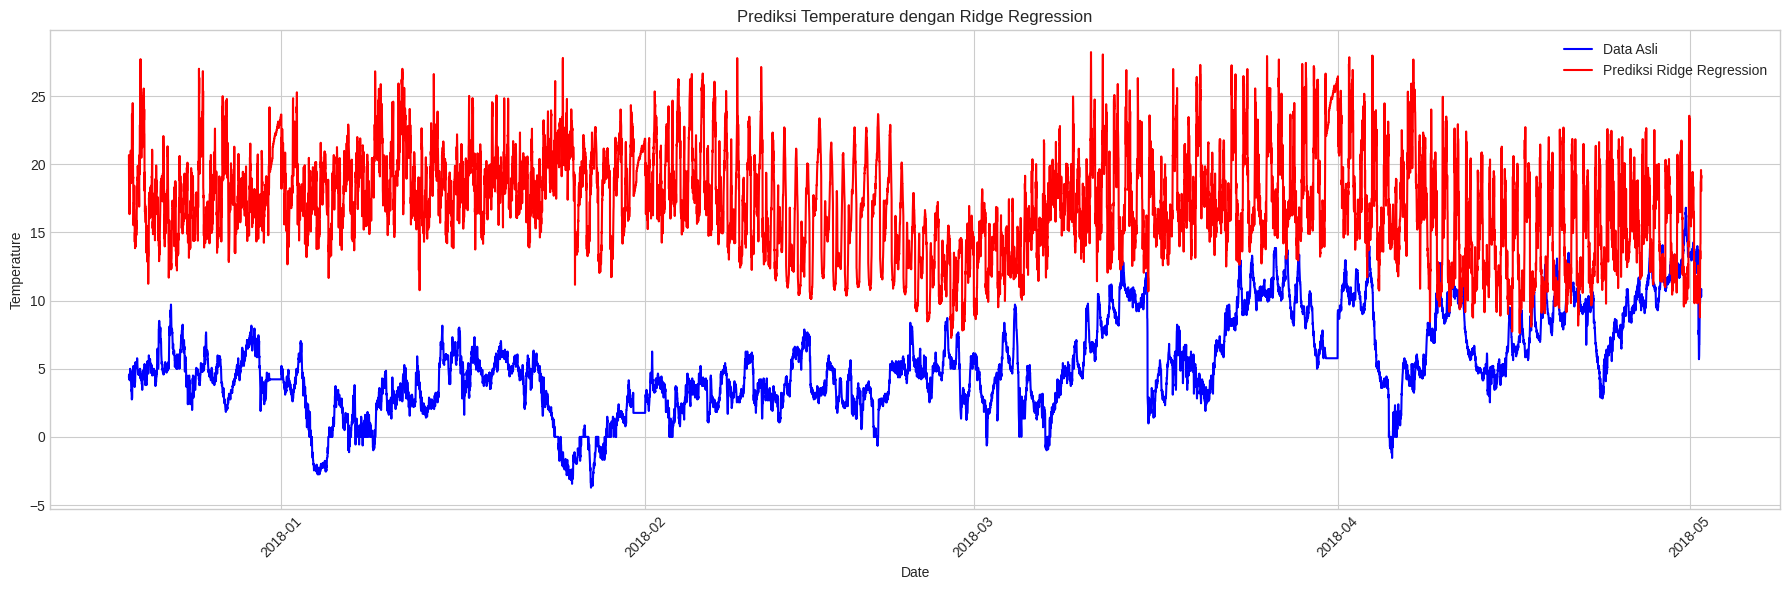

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_testRR.copy()
results['Actual'] = y_testRR
results['Predicted'] = y_predRR
results['date'] = df.loc[X_testRR.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Actual'], label='Data Asli', color='blue')
plt.plot(results['date'], results['Predicted'], label='Prediksi Ridge Regression', color='red')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Ridge Regression')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

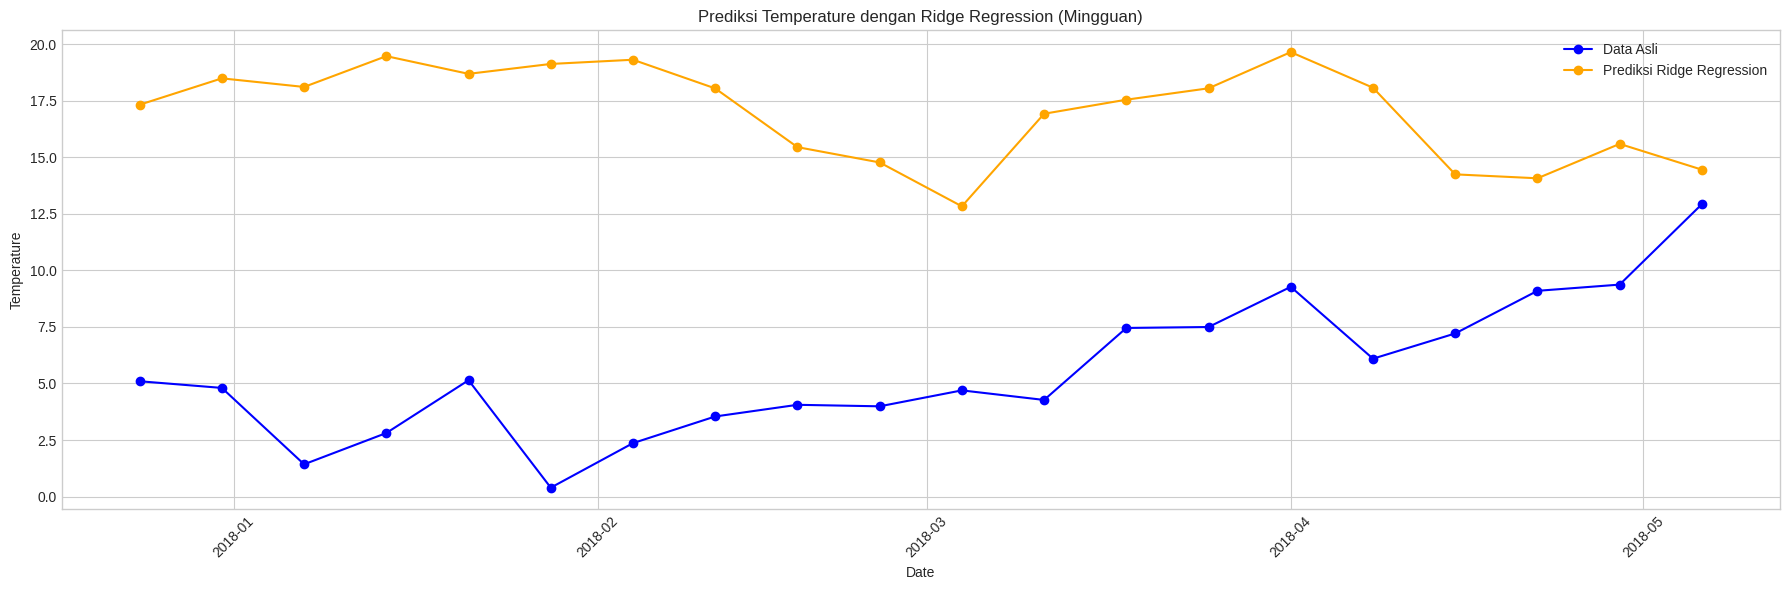

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# DataFrame untuk hasil prediksi
results = X_testRR.copy()
results['Actual'] = y_testRR
results['Predicted'] = y_predRR
results['date'] = df.loc[X_testRR.index, 'date']

# Mengubah tipe data menjadi datetime
results['date'] = pd.to_datetime(results['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Resample data to weekly frequency
weekly_results = results.resample('W').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(weekly_results['date'], weekly_results['Actual'], label='Data Asli', color='blue', marker='o')
plt.plot(weekly_results['date'], weekly_results['Predicted'], label='Prediksi Ridge Regression', color='orange', marker='o')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Ridge Regression (Mingguan)')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Learning Curve

Rata-rata gap antara nilai R² pada set pelatihan dan validasi: 27.110149623671923


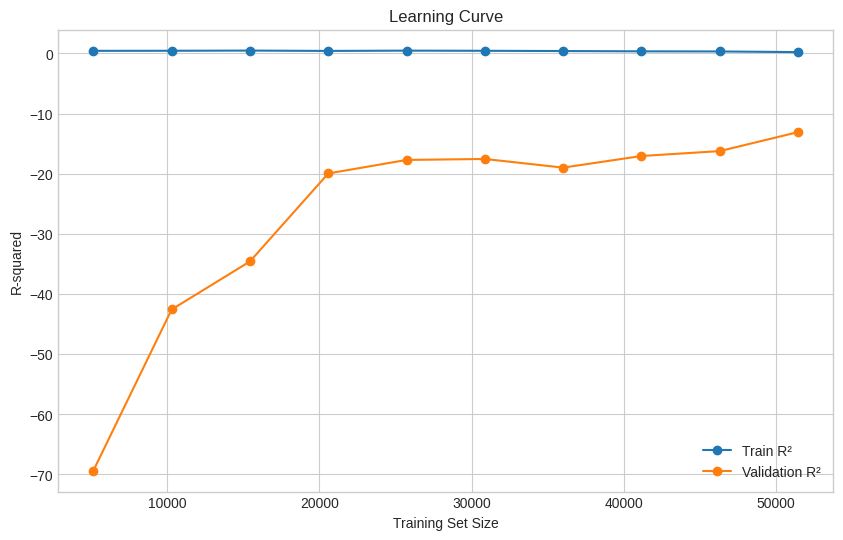

In [ ]:
from sklearn.linear_model import Lasso

# Fungsi untuk menghitung learning curve dan rata-rata gap
def plot_learning_curve(model, X_trainRR, y_trainRR, X_testRR, y_testRR, train_sizes):
    train_scores = []
    test_scores = []
    gaps = []

    for train_size in train_sizes:
        # Ambil subset dari data train
        X_trainRR_subset = X_trainRR[:train_size]
        y_trainRR_subset = y_trainRR[:train_size]

        # Latih model pada subset
        model.fit(X_trainRR_subset, y_trainRR_subset)

        # Prediksi pada set train dan set test
        y_trainRR_pred = model.predict(X_trainRR_subset)
        y_testRR_pred = model.predict(X_testRR)

        # Hitung R-squared untuk set train dan set test
        train_r2 = r2_score(y_trainRR_subset, y_trainRR_pred)
        test_r2 = r2_score(y_testRR, y_testRR_pred)

        # Hitung gap
        gap = train_r2 - test_r2

        # Simpan skor dan gap
        train_scores.append(train_r2)
        test_scores.append(test_r2)
        gaps.append(gap)

    # Hitung rata-rata gap
    average_gap = np.mean(gaps)
    print(f'Rata-rata gap antara nilai R² pada set pelatihan dan validasi: {average_gap}')

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores, label='Train R²', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation R²', marker='o')
    plt.xlabel('Training Set Size')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

# Tentukan ukuran subset untuk training
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_trainRR)
train_sizes = train_sizes.astype(int)

# Inisialisasi model Ridge
model = Ridge(alpha=0.1)  # Sesuaikan alpha sesuai kebutuhan

# Plot learning curve dan hitung rata-rata gap
plot_learning_curve(model, X_trainRR, y_trainRR, X_testRR, y_testRR, train_sizes)

*Dari hasil learning curve, model Ridge mengalami underfitting karena hasil training dan testing R-squared sangat rendah*

### Matrik Evaluasi

In [ ]:
# Menghitung metrik evaluasi
mseRR= mean_squared_error(y_testRR, y_predRR)
maeRR= mean_absolute_error(y_testRR, y_predRR)
rmseRR= np.sqrt(mseRR)
madRR= median_absolute_error(y_testRR, y_predRR)
r2RR= r2_score(y_testRR, y_predRR)

# Hitung rentang data
data_range = np.max(y_testRR) - np.min(y_testRR)

# Scaled Mean absolute Error (SMAE)
smaeRR= maeRR/ data_range

# Normalized Root Mean Squared Error (NRMSE)
nrmseRR= rmseRR/ data_range

print(f"Mean Squared Error: {mseRR}")
print(f"Mean Absolute Error: {maeRR}")
print(f"Root Mean Squared Error: {rmseRR}")
print(f"R-squared: {r2RR}")
print("Median Absolute Error (MAD):", madRR)
print("Scaled Mean Lsolute Error (SMAE):", smaeRR)
print("Normalized Root Mean Squared Error (NRMSE):", nrmseRR)

Mean Squared Error: 170.20575968563116
Mean Absolute Error: 11.869907159042636
Root Mean Squared Error: 13.046292948022867
R-squared: -13.078148702814563
Median Absolute Error (MAD): 12.107098419807771
Scaled Mean Lsolute Error (SMAE): 0.5778641331504132
Normalized Root Mean Squared Error (NRMSE): 0.6351342655188582


*Model Ridge memiliki nilai MAE, MAD, SMAE, NRMSE yang tinggi sehingga model tidak mampu melakukan prediksi yang akurat*

#**MODEL COMPARISON**

In [ ]:
mse_values = {
    'Kalman Filter': mseKF,
    'XGBoost': mseXGBoost_,
    'LightGBM': mseLGBM_,
    'Gradient Boosting Regression': msegbr2,
    'AdaBoost Regression': mseAB,
    'Lasso Regression': mseL,
    'Ridge Regression': mseRR,
}

mae_values = {
    'Kalman Filter': maeKF,
    'XGBoost': maeXGBoost_,
    'LightGBM': maeLGBM_,
    'Gradient Boosting Regression': maegbr2,
    'AdaBoost Regression': maeAB,
    'Lasso Regression': maeL,
    'Ridge Regression': maeRR,
}

rmse_values = {
    'Kalman Filter': rmseKF,
    'XGBoost': rmseXGBoost_,
    'LightGBM': rmseLGBM_,
    'Gradient Boosting Regression': rmsegbr2,
    'AdaBoost Regression': rmseAB,
    'Lasso Regression': rmseL,
    'Ridge Regression': rmseRR,
}

r2_values = {
    'Kalman Filter': r2KF,
    'XGBoost': r2XGBoost_,
    'LightGBM': r2LGBM_,
    'Gradient Boosting Regression': r2gbr2,
    'AdaBoost Regression': r2AB,
    'Lasso Regression': r2L,
    'Ridge Regression': r2RR,
}

mad_values = {
    'Kalman Filter': madKF,
    'XGBoost': madXGBoost_,
    'LightGBM': madLGBM_,
    'Gradient Boosting Regression': madgbr2,
    'AdaBoost Regression': madAB,
    'Lasso Regression': madL,
    'Ridge Regression': madRR,
}

smae_values = {
    'Kalman Filter': smaeKF,
    'XGBoost': smaeXGBoost_,
    'LightGBM': smaeLGBM_,
    'Gradient Boosting Regression': smaegbr2,
    'AdaBoost Regression': smaeAB,
    'Lasso Regression': smaeL,
    'Ridge Regression': smaeRR,
}

nrmse_values = {
    'Kalman Filter': nrmseKF,
    'XGBoost': nrmseXGBoost_,
    'LightGBM': nrmseLGBM_,
    'Gradient Boosting Regression': nrmsegbr2,
    'AdaBoost Regression': nrmseAB,
    'Lasso Regression': nrmseL,
    'Ridge Regression': nrmseRR,
}

# Buat DataFrame dari dictionary
MC = pd.DataFrame({
    'Model': list(mae_values.keys()),  # Menggunakan kunci dari salah satu dictionary sebagai model
    'MAE': list(mae_values.values()),
    'RMSE': list(rmse_values.values()),
    'MAD': list(mad_values.values()),
    'SMAE': list(smae_values.values()),
    'NRMSE': list(nrmse_values.values()),
    'R2': list(r2_values.values()),
    'MSE': list(mse_values.values()),


})

MC

MC_sorted = MC.sort_values(by='R2', ascending=False)
MC_sorted

Model        MAE       RMSE        MAD      SMAE  \
0                 Kalman Filter   0.049335   0.203754   0.035884  0.002402   
1                       XGBoost   4.490977   5.709324   3.665510  0.218635   
2                      LightGBM   5.064076   6.070384   4.458242  0.246535   
4           AdaBoost Regression   5.724614   6.435939   5.263290  0.278692   
3  Gradient Boosting Regression   8.246214  10.022049   7.161890  0.401451   
5              Lasso Regression  11.822109  12.955492  12.055063  0.575537   
6              Ridge Regression  11.869907  13.046293  12.107098  0.577864   

      NRMSE         R2         MSE  
0  0.009919   0.996566    0.041516  
1  0.277948  -1.696129   32.596382  
2  0.295525  -2.047921   36.849564  
4  0.313322  -2.426062   41.421314  
3  0.487905  -7.307768  100.441472  
5  0.630714 -12.882866  167.844778  
6  0.635134 -13.078149  170.205760

*Untuk menilai seberapa baik performa model yang sudah dibuat, kami fokus terhadap beberapa hasil metric evaluasi yang robust terhadap outlier, karena data kami mempunyai cukup banyak outlier dalam kasus time series*

1. *Mean Absolute Error (MAE): MAE menghitung rata-rata nilai absolut dari error. Metrik ini tidak terpengaruh oleh outlier sebesar MSE, MAE, dan RMSE.*

2. *Median Absolute Error (MAD): MAD menghitung median nilai absolut dari error. Metrik ini lebih robust terhadap outlier ekstrem dibandingkan ΜΑΕ.*

3. *Scaled Mean Absolute Error (SMAE): SMAE menskalakan MAE dengan rentang data, sehingga memungkinkan perbandingan model pada data dengan skala yang berbeda.*

4. *Normalized Root Mean Squared Error (NRMSE): NRMSE menskalakan RMSE dengan rentang data, sehingga memungkinkan perbandingan model pada data dengan skala yang berbeda.*

*Dari beberapa model di atas terlihat bahwa model kalman filter ydan Xgboost yang memiliki nilai MAE, MAD, SMAE, dan NRSME yang rendah meskipun pada Xgboost nilai R-squared nya negatif tetapi model masih mampu memprediksi dengan baik*

# HYPERPARAMETER TUNING

*Hyperparameter tunning dilakukan untuk memilih nilai optimal untuk hyperparameter dalam sebuah model machine learning. Dari model yang sudah dibuat, terdapat 2 model terbaik yang akan ditunning yaitu Kalman filter dan Xgboost*

##Kalman Filter

Best R²: 0.996796615318822
Best parameters:
{'observation_covariance': array([[5.]]), 'transition_covariance': array([[5., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 0., 5.]])}


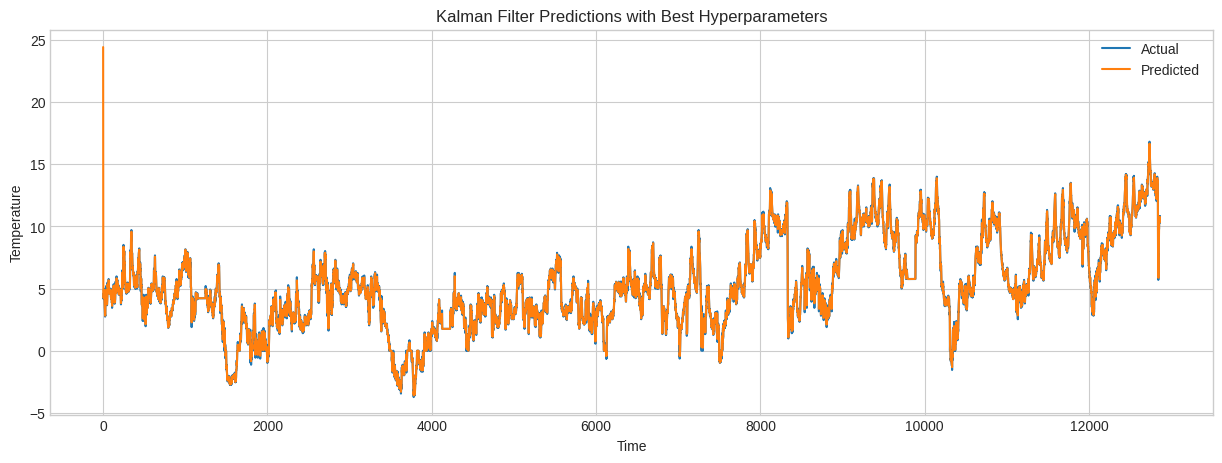

Train MSE: 0.014580046338104944, Test MSE: 0.038729135111081774
Train MAE: 0.0820680821470968, Test MAE: 0.057802837918373026
Train RMSE: 0.12074786266474842, Test RMSE: 0.1967971928435001
Train MAD: 0.058262323921894676, Test MAD: 0.04232856780394334


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, ParameterGrid
from pykalman import KalmanFilter

# Splitting Data
X = df_scaled.drop(columns=['Temperature','pm2.5','PRES','Extreme Weather', 'Seasons'])
y = df_scaled['Temperature']

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)

# Konversi target menjadi float
y_trainK = y_trainK.astype(float)
y_testK = y_testK.astype(float)
dim_x = 7
dim_z = 1

# Parameter grid untuk Q dan R
param_grid = {
    'transition_covariance': [np.eye(dim_x) * scale for scale in [0.1, 0.5, 1.0, 2.0, 5.0]],
    'observation_covariance': [np.eye(dim_z) * scale for scale in [0.1, 0.5, 1.0, 2.0, 5.0]]
}

best_score = -np.inf
best_params = None

# Grid search untuk hyperparameter tuning
for params in ParameterGrid(param_grid):
    # Inisialisasi Kalman Filter dengan hyperparameter saat ini
    kf = KalmanFilter(n_dim_obs=dim_z, n_dim_state=dim_x,
                      transition_covariance=params['transition_covariance'],
                      observation_covariance=params['observation_covariance'])

    # Latih model menggunakan EM
    kf = kf.em(y_trainK, n_iter=10)

    # Prediksi pada data train dan test
    y_trainK_pred, _ = kf.smooth(y_trainK)
    y_testK_pred, _ = kf.smooth(y_testK)

    # Ambil hanya kolom pertama dari prediksi karena hanya ada satu observasi
    y_trainK_pred = y_trainK_pred[:, 0]
    y_testK_pred = y_testK_pred[:, 0]

    # Hitung metrik evaluasi (R-squared)
    test_r2 = r2_score(y_testK, y_testK_pred)

    # Simpan parameter jika performa meningkat
    if test_r2 > best_score:
        best_score = test_r2
        best_params = params

print(f"Best R²: {best_score}")
print("Best parameters:")
print(best_params)

# Latih ulang model dengan parameter terbaik
kf_best = KalmanFilter(n_dim_obs=dim_z, n_dim_state=dim_x,
                       transition_covariance=best_params['transition_covariance'],
                       observation_covariance=best_params['observation_covariance'])
kf_best = kf_best.em(y_trainK, n_iter=10)
y_trainK_pred, _ = kf_best.smooth(y_trainK)
y_testK_pred, _ = kf_best.smooth(y_testK)
y_trainK_pred = y_trainK_pred[:, 0]
y_testK_pred = y_testK_pred[:, 0]

# Plot hasil prediksi
plt.figure(figsize=(15, 5))
plt.plot(y_testK.values, label='Actual')
plt.plot(y_testK_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Kalman Filter Predictions with Best Hyperparameters')
plt.legend()
plt.show()

# Hitung metrik evaluasi lainnya
train_mse = mean_squared_error(y_trainK, y_trainK_pred)
test_mse = mean_squared_error(y_testK, y_testK_pred)

train_mae = mean_absolute_error(y_trainK, y_trainK_pred)
test_mae = mean_absolute_error(y_testK, y_testK_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mad = median_absolute_error(y_trainK, y_trainK_pred)
test_mad = median_absolute_error(y_testK, y_testK_pred)

# Cetak hasil metrik evaluasi
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAD: {train_mad}, Test MAD: {test_mad}")

##Extreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = df_scaled.drop(columns=['date', 'Temperature','pm2.5','PRES','Extreme Weather'])
y = df_scaled['Temperature']

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = False)

# Konversi target menjadi float
y_train = y_train0.astype(float)
y_test = y_test0.astype(float)

# Definisikan model XGBoost
model = XGBRegressor()

# Tentukan kumpulan hyperparameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [50, 100, 150], # Jumlah pohon keputusan
    'learning_rate': [0.01, 0.1, 0.5], # Tingkat pembelajaran
    'max_depth': [5, 10, 15], # Kedalaman maksimum setiap pohon
    'subsample': [0.8, 1.0], # Ukuran sampel yang dipilih untuk pelatihan setiap pohon
    'colsample_bytree': [0.8, 1.0], # Persentase fitur yang dipilih untuk membangun setiap pohon
}
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Lakukan pencarian grid pada data
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Cetak skor terbaik yang ditemukan
print("Skor terbaik:", grid_search.best_score_)

# Gunakan parameter terbaik yang ditemukan dari GridSearchCV
best_params = grid_search.best_params_
model = XGBRegressor(**best_params)

# Latih model menggunakan parameter terbaik pada seluruh set data pelatihan
model.fit(X_train, y_train)

# Prediksi nilai target pada data pengujian
y_pred = model.predict(X_test)

# Hitung MSE dan R-squared score pada data pengujian
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print("MSE setelah penyetelan hyperparameter:", mse)
print("R-squared setelah penyetelan hyperparameter:", r2)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Parameter terbaik: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Skor terbaik: -0.43125622562837523
MSE setelah penyetelan hyperparameter: 67.06381821497462
R-squared setelah penyetelan hyperparameter: -4.547017957281505


*Setelah melakukan hyperparameter tunning, didapatkan parameter, R_squared, dan MSE terbaik untuk masing-masing model pada Kalman filter dan Xgboost*

#**PREDIKSI DATA TEST**

*Setelah melakukan pelatihan dan evaluasi dari beberapa model, maka didapatkan 2 model terbaik yakni Model Kalman Filter dan XGBoost. Sehingga, langkah selanjutnya adalah melakukan prediksi dari dataset test untuk mendapatkan nilai temperature*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Memasukkan dataset test dalam python agar mendapatkan nilai temperature menggunakan masing-masing model.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_test = pd.read_csv('/content/drive/My Drive/Dataset Final Project/test.csv')
df_test

id                 date     Iws     Ir  pm2.5   PRES   cbwd   DEWP
0     64320  2018-05-02 00:00:00  14.133  2.076  9.346 -0.036  4.538  1.279
1     64321  2018-05-02 00:15:00  12.123  1.541  7.818 -0.746  4.538  1.249
2     64322  2018-05-02 00:30:00  12.525  1.741  8.209 -0.284  4.477  1.279
3     64323  2018-05-02 00:45:00  12.324  1.942  7.747  0.249  4.630  1.371
4     64324  2018-05-02 01:00:00  14.602  1.407  9.630 -0.320  4.477  1.310
...     ...                  ...     ...    ...    ...    ...    ...    ...
5355  69675  2018-06-26 18:45:00   9.310  3.550  5.437  1.670  3.868  1.462
5356  69676  2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462
5357  69677  2018-06-26 19:15:00  10.784  3.349  7.000  1.635  3.746  1.432
5358  69678  2018-06-26 19:30:00  11.655  3.617  7.533  1.706  4.173  1.523
5359  69679  2018-06-26 19:45:00  12.994  3.818  8.244  1.777  4.721  1.523

[5360 rows x 8 columns]

*df_test merupakan dataset yang digunakan untuk memperoleh nilai temperature yang mana terdiri atas beberapa kolom yakni :*
- *id merupakan kolom yang menunjukkan indeks dari dataset*
- *date merupakan kolom yang berisi tanggal dan waktu prediksi*
- *Iws merupakan kolom yang berisi data kecepatan angin*
- *Ir merupakan kolom yang berisi data intensitas curah hujan*
- *pm2.5 merupakan kolom yang berisi data materi partikulat halus*
- *PRES merupakan kolom yang berisi data tekanan atmosfer*
- *cbwd merupakan kolom yang berisi data arah pergerakan angin*
- *DEWP merupakan kolom yang berisi data suhu titik embun*

##Prediksi Data FE

*Ketika melakukan pelatihan dan evaluasi model terdapat penambahan fitur, sehingga df_test juga harus disesuaikan untuk ditambah Feature Engineering yang sesuai.*

In [ ]:
df_test1 = pd.read_csv('/content/drive/My Drive/Dataset Final Project/test.csv')
df_test1

id                 date     Iws     Ir  pm2.5   PRES   cbwd   DEWP
0     64320  2018-05-02 00:00:00  14.133  2.076  9.346 -0.036  4.538  1.279
1     64321  2018-05-02 00:15:00  12.123  1.541  7.818 -0.746  4.538  1.249
2     64322  2018-05-02 00:30:00  12.525  1.741  8.209 -0.284  4.477  1.279
3     64323  2018-05-02 00:45:00  12.324  1.942  7.747  0.249  4.630  1.371
4     64324  2018-05-02 01:00:00  14.602  1.407  9.630 -0.320  4.477  1.310
...     ...                  ...     ...    ...    ...    ...    ...    ...
5355  69675  2018-06-26 18:45:00   9.310  3.550  5.437  1.670  3.868  1.462
5356  69676  2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462
5357  69677  2018-06-26 19:15:00  10.784  3.349  7.000  1.635  3.746  1.432
5358  69678  2018-06-26 19:30:00  11.655  3.617  7.533  1.706  4.173  1.523
5359  69679  2018-06-26 19:45:00  12.994  3.818  8.244  1.777  4.721  1.523

[5360 rows x 8 columns]

In [ ]:
import pandas as pd
# Ubah kolom 'date' menjadi datetime
df_test1['date'] = pd.to_datetime(df_test1['date'])

# Pisahkan tanggal dan waktu dengan delimiter spasi
df_test1[['date', 'time']] = df_test1['date'].astype(str).str.split(' ', expand=True)

# Pisahkan tanggal menjadi tiga kolom terpisah
df_test1[['year', 'month', 'day']] = df_test1['date'].str.split('-', expand=True)

# Tampilkan DataFrame hasil
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  
0     2018    05  02  
1     2018    05  02  
2     2018    05  02  
3     2018    05  02  
4     2018    05  02  
...    ...   ...  ..  
5355  2018    06  26  
5356  2018    06  26  
5357  2018    06  26  
5358  2018    06  26  
5359  2018    06  26  

[5360 rows x 12 columns]

###Pembagian Waktu

*Feature Engineering yang pertama adlaah pembagian waktu. Dalam data ini, waktu dibagi menjadi 4 yakni Moring, Afternoon, Evening, dan Night*

In [ ]:
df_test1['time'] = pd.to_datetime(df_test1['time'], format='%H:%M:%S')
df_test1['hour'] = df_test1['time'].dt.hour

# Fungsi untuk menentukan kategori waktu
def hour_category(hour):
    if 0 <= hour < 6:
        return 'Pagi'
    elif 6 <= hour < 12:
        return 'Siang'
    elif 12 <= hour < 18:
        return 'Sore'
    else:
        return 'Malam'

# Terapkan fungsi kategori waktu ke kolom 'hour'
df_test1['Time Period'] = df_test1['hour'].apply(hour_category)

# Kembalikan kolom 'time' ke format hanya waktu (datetime.time)
df_test1['time'] = df_test1['time'].dt.time

# Tampilkan DataFrame hasil
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour Time Period  
0     2018    05  02     0        Pagi  
1     2018    05  02     0        Pagi  
2     2018    05  02     0        Pagi  
3     2018    05  02     0        Pagi  
4     2018    05  02     1        Pagi  
...    ...   ...  ..   ...         ...  
5355  2018    06  26    18       Malam  
5356  2018    06  26    19       Malam  
5357  2018    06  26    19       Malam  
5358  2018    06  26    19       Malam  
5359  2018    06  26    19       Malam  

[5360 rows x 14 columns]

###Cuaca Ekstrim

*Tambahan fitur selanjutnya adalah klasifikasi cuaca yang mana dibagi menjadi dua, yakni cuca ekstrim (1) dan tidak esktrim (0)*

In [ ]:
def cek_cuaca_ekstrim(row):
    if row['Iws'] > 12.5:
        return 1  # Hari cuaca ekstrim
    else:
        return 0  # Bukan hari cuaca ekstrim

df_test1['Extreme Weather'] = df_test1.apply(cek_cuaca_ekstrim, axis=1)
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour Time Period  Extreme Weather  
0     2018    05  02     0        Pagi                1  
1     2018    05  02     0        Pagi                0  
2     2018    05  02     0        Pagi                1  
3     2018    05  02     0        Pagi                0  
4     2018    05  02     1        Pagi                1  
...    ...   ...  ..   ...         ...              ...  
5355  2018    06  26    18       Malam                0  
5356  2018    06  26    19       Malam                0  
5357  2018    06  26    19       Malam                0  
5358  2018    06  26    19       Malam                0  
5359  2018    06  26    19       Malam                1  

[5360 rows x 15 columns]

###Kategori Musim

In [ ]:
# Mengonversi kolom 'date' menjadi tipe data datetime
df_test['date'] = pd.to_datetime(df_test['date'])

# Ekstraksi bulan dari kolom 'date' dan simpan dalam kolom baru 'Bulan'
df_test1['Month'] = df_test['date'].dt.month
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour Time Period  Extreme Weather  Month  
0     2018    05  02     0        Pagi                1      5  
1     2018    05  02     0        Pagi                0      5  
2     2018    05  02     0        Pagi                1      5  
3     2018    05  02     0        Pagi                0      5  
4     2018    05  02     1        Pagi                1      5  
...    ...   ...  ..   ...         ...              ...    ...  
5355  2018    06  26    18       Malam                0      6  
5356  2018    06  26    19       Malam                0      6  
5357  2018    06  26    19       Malam                0      6  
5358  2018    06  26    19       Malam                0      6  
5359  2018    06  26    19       Malam                1      6  

[5360 rows x 16 columns]

*Fitu tambahan yang ketiga adalah pengkategorian musim. Menurut intepratasi kami, data ini adalah data cuaca dari suatu tempat di belahan bumi utara. Yang mana pembagian musimnya adalah sebagai berikut :*
- *Musim Dingin (Winter) terjadi pada Desember hingga Februari*
- *Musim Semi (Spring) terjadi pada bulan Maret hingga Mei*
- *Musim Panas (Summer) terjadi pada bulan Juni hingga Agustus*
- *Musim gugur (Autumn) terjadi pada bulan September hingga November*

In [ ]:
import pandas as pd

# Fungsi untuk menentukan musim berdasarkan bulan
def determine_season(Month):
    if Month in [12, 1, 2]:
        return 'Winter'
    elif Month in [3, 4, 5]:
        return 'Spring'
    elif Month in [6, 7, 8]:
        return 'Summer'
    elif Month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Tidak Diketahui'

# Menentukan musim berdasarkan bulan
df_test1['Seasons'] = df_test1['Month'].apply(determine_season)
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour Time Period  Extreme Weather  Month Seasons  
0     2018    05  02     0        Pagi                1      5  Spring  
1     2018    05  02     0        Pagi                0      5  Spring  
2     2018    05  02     0        Pagi                1      5  Spring  
3     2018    05  02     0        Pagi                0      5  Spring  
4     2018    05  02     1        Pagi                1      5  Spring  
...    ...   ...  ..   ...         ...              ...    ...     ...  
5355  2018    06  26    18       Malam                0      6  Summer  
5356  2018    06  26    19       Malam                0      6  Summer  
5357  2018    06  26    19       Malam                0      6  Summer  
5358  2018    06  26    19       Malam                0      6  Summer  
5359  2018    06  26    19       Malam                1      6  Summer  

[5360 rows x 17 columns]

In [ ]:
kategori_musim1 = pd.pivot_table(df_test1, index='Seasons', aggfunc='size')
kategori_musim1 = kategori_musim1.reset_index(name='Jumlah')
kategori_musim1

Seasons  Jumlah
0  Spring    2880
1  Summer    2480

*Prediksi yang akan dilakukan menggunakan data bulan Mei dan Juni sehingga, hanya terdapat 2 kategori musim yakni musim Semi (Spring) pada bulan Mei dan musim Panas (Summer) pada bulan Juni.*

###Kategori Kecepatan Angin

*Pengkategorian kecepatan ini berdasarkan Skala Beufort yang mana terdiri atas 13 tingkatan dari kecepatan angin tenang hingga adai topan.*

In [ ]:
import pandas as pd

# Mengubah tipe data kolom 'Iws' menjadi float
df_test1['Iws'] = df_test1['Iws'].astype(float)

# Fungsi untuk mengkategorikan kecepatan angin berdasarkan Skala Beaufort
def kategori_kecepatan_angin(Iws):
    if Iws < 0.28:
        return 'Calm'
    elif Iws > 0.28 and Iws <= 5.28:
        return 'Gentle breeze'
    elif Iws > 5.28 and Iws <= 8:
        return 'Moderate breeze'
    elif Iws > 8 and Iws <= 10.8:
        return 'Cool'
    elif Iws > 10.8 and Iws <= 13.9:
        return 'Strong breeze'
    elif Iws > 13.9 and Iws <= 20.7:
        return 'Gale'
    elif Iws > 20.7 and Iws <= 24.5:
        return 'Strong Gale'
    elif Iws > 24.5 and Iws <= 28.4:
        return 'Storm'
    elif Iws > 28.4 and Iws <= 32.6:
        return 'Violent Storm'
    elif Iws > 32.6:
        return 'Hurricane'
    else:
        return 'Anomaly'
# Menerapkan fungsi kategori_kecepatan_angin ke kolom 'Iws'
df_test1['Wind Speed Category'] = df_test1['Iws'].apply(kategori_kecepatan_angin)
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour Time Period  Extreme Weather  Month Seasons  \
0     2018    05  02     0        Pagi                1      5  Spring   
1     2018    05  02     0        Pagi                0      5  Spring   
2     2018    05  02     0        Pagi                1      5  Spring   
3     2018    05  02     0        Pagi                0      5  Spring   
4     2018    05  02     1        Pagi                1      5  Spring   
...    ...   ...  ..   ...         ...              ...    ...     ...   
5355  2018    06  26    18       Malam                0      6  Summer   
5356  2018    06  26    19       Malam                0      6  Summer   
5357  2018    06  26    19       Malam                0      6  Summer   
5358  2018    06  26    19       Malam                0      6  Summer   
5359  2018    06  26    19       Malam                1      6  Summer   

     Wind Speed Category  
0                   Gale  
1          Strong breeze  
2          Strong breeze  
3          Strong breeze  
4                   Gale  
...                  ...  
5355                Cool  
5356                Cool  
5357                Cool  
5358       Strong breeze  
5359       Strong breeze  

[5360 rows x 18 columns]

In [ ]:
total_per_kategori2 = df_test1['Wind Speed Category'].value_counts()
total_per_kategori2

Wind Speed Category
Calm               1185
Strong breeze       996
Gale                984
Cool                790
Moderate breeze     790
Gentle breeze       615
Name: count, dtype: int64

*Dari output di atas dapat diketahui bahwa pada bulan Mei dan Juni berkemungkinan tidak ada badai dan akan banyak hari dengan angin tenang.*

In [ ]:
import pandas as pd

# Misalnya DataFrame Anda adalah df
df = df_test1
df.to_excel('/content/drive/MyDrive/Dataset Final Project/HAI HAI.xlsx', index=False)

###Encoding

*Untuk memudahkan dalam pemrosesan data, maka dilakukan encoding untuk fitur periode waktu (Time Period), musim (Season), dan kategori kecepatan angin (Wind Speed Category)*

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_test1['Time Period'] = label_encoder.fit_transform(df_test1['Time Period'])
df_test1['Seasons'] = label_encoder.fit_transform(df_test1['Seasons'])
df_test1['Wind Speed Category'] = label_encoder.fit_transform(df_test1['Wind Speed Category'])

df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour  Time Period  Extreme Weather  Month  Seasons  \
0     2018    05  02     0            1                1      5        0   
1     2018    05  02     0            1                0      5        0   
2     2018    05  02     0            1                1      5        0   
3     2018    05  02     0            1                0      5        0   
4     2018    05  02     1            1                1      5        0   
...    ...   ...  ..   ...          ...              ...    ...      ...   
5355  2018    06  26    18            0                0      6        1   
5356  2018    06  26    19            0                0      6        1   
5357  2018    06  26    19            0                0      6        1   
5358  2018    06  26    19            0                0      6        1   
5359  2018    06  26    19            0                1      6        1   

      Wind Speed Category  
0                       2  
1                       5  
2                       5  
3                       5  
4                       2  
...                   ...  
5355                    1  
5356                    1  
5357                    1  
5358                    5  
5359                    5  

[5360 rows x 18 columns]

## Prediksi Temperature

*Berikut ini merupakan penerapan model Kalman Filter dan Extreme Gradient Boosting untuk mendapatkan nilai temperature.*

###Kalman Filter

In [ ]:
!pip install pykalman

In [ ]:
from filterpy.kalman import KalmanFilter
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Asumsi bahwa df_train dan df_test1 sudah didefinisikan sebelumnya dan berisi data yang akan diprediksi

# Inisialisasi StandardScaler dan fit pada data pelatihan
scaler = StandardScaler()

# Misalnya, Anda ingin memfit scaler pada kolom suhu dari data pelatihan
# Sesuaikan ini dengan kolom yang benar dari data pelatihan Anda
scaler.fit(df_scaled[['Temperature']])

def initialize_kalman_filter(observation_covariance, transition_covariance):
    kf = KalmanFilter(dim_x=7, dim_z=1)
    kf.F = np.eye(7)  # Matriks transisi identitas untuk simplifikasi
    kf.H = np.ones((1, 7))  # Matriks observasi yang mengagregasi observasi ke satu nilai rata-rata
    kf.P *= 1000  # Matriks kovariansi inisial yang besar
    kf.R = observation_covariance  # Kovariansi observasi
    kf.Q = transition_covariance  # Kovariansi transisi
    kf.x = np.zeros(7)  # Inisialisasi state dengan nilai nol
    return kf

observation_covariance = np.array([[5.]])
transition_covariance = np.array([[5., 0., 0., 0., 0., 0., 0.],
                                  [0., 5., 0., 0., 0., 0., 0.],
                                  [0., 0., 5., 0., 0., 0., 0.],
                                  [0., 0., 0., 5., 0., 0., 0.],
                                  [0., 0., 0., 0., 5., 0., 0.],
                                  [0., 0., 0., 0., 0., 5., 0.],
                                  [0., 0., 0., 0., 0., 0., 5.]])

kf = initialize_kalman_filter(observation_covariance, transition_covariance)

# Fungsi untuk invers transformasi
def inverse_transform(scaled_value):
    return scaler.inverse_transform(np.array(scaled_value).reshape(-1, 1)).flatten()[0]

# Prediksi suhu untuk data test
test_predictions = []
for index, row in df_test1.iterrows():
    other_variable_observation = row[['Iws', 'Ir', 'cbwd', 'DEWP', 'hour', 'Time Period', 'Seasons', 'Wind Speed Category']].values
    aggregated_observation = np.mean(other_variable_observation)

    # Pastikan observasi tidak semua nol
    if np.all(other_variable_observation == 0):
        aggregated_observation = 0.01  # atau nilai kecil lainnya sebagai default

    kf.predict()
    kf.update([[aggregated_observation]])
    temperature_prediction = kf.x[0]

    # Lakukan invers transformasi jika diperlukan
    temperature_prediction = inverse_transform(temperature_prediction)

    test_predictions.append(temperature_prediction)

# Tambahkan prediksi suhu ke dalam data test sebagai kolom baru
df_test1['TP_KF'] = test_predictions
print(df_test1)


         id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour  Time Period

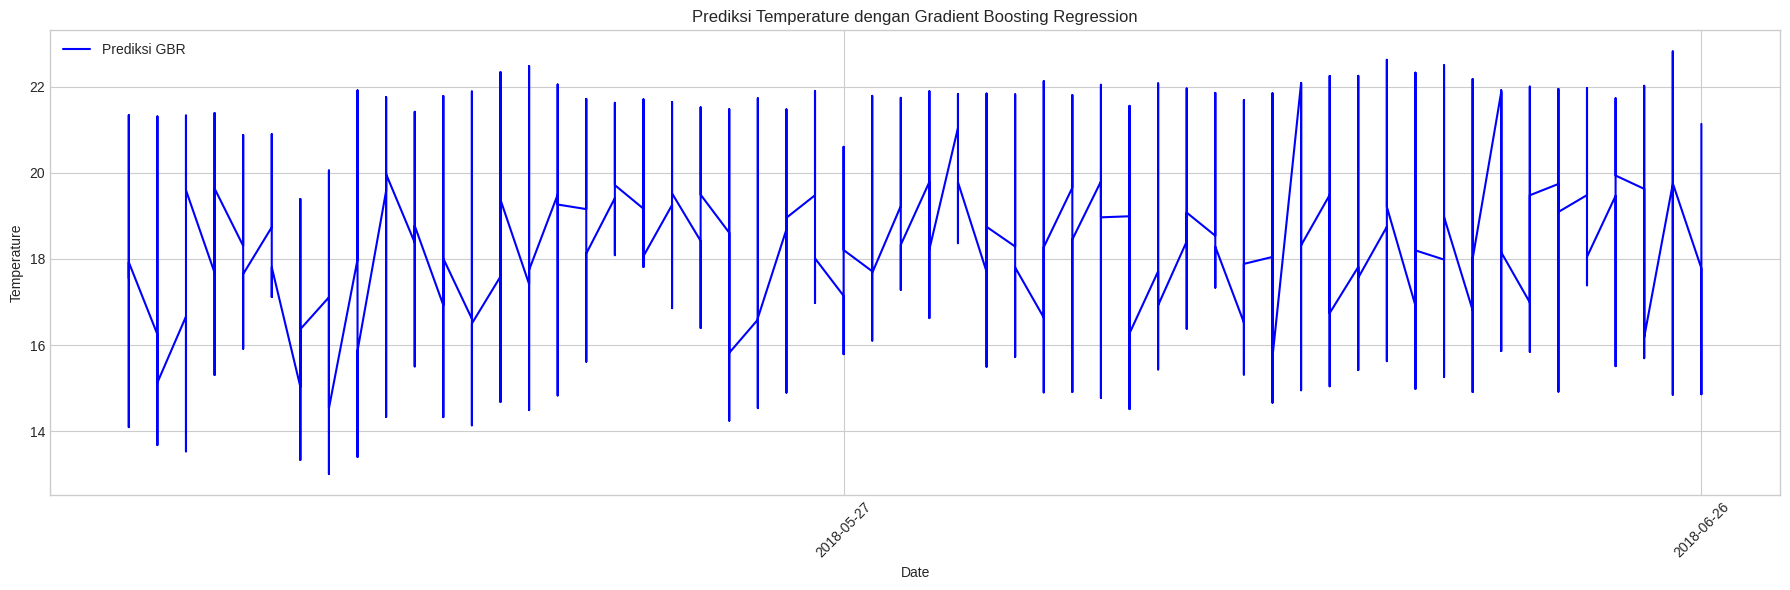

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# DataFrame untuk hasil prediksi
results = df_test1.copy()  # Buat salinan dataframe agar tidak merusak dataframe asli
results['Predicted'] = df_test1['TP_KF']  # Menggunakan hasil prediksi dari Kalman Filter

# Ubah 'date' menjadi tipe data datetime
results['date'] = pd.to_datetime(df_test1['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Predicted'], label='Prediksi GBR', color='blue')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Gradient Boosting Regression')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Extreme Gradient Boosting

In [ ]:
import xgboost as xgb

# Inisialisasi model XGBoost dengan parameter terbaik
best_params = {
    'n_estimators': 100, # Jumlah pohon keputusan
    'learning_rate': 0.01, # Tingkat pembelajaran
    'max_depth': 5, # Kedalaman maksimum setiap pohon
    'subsample': 0.8, # Ukuran sampel yang dipilih untuk pelatihan setiap pohon
    'colsample_bytree': 0.8, # Persentase fitur yang dipilih untuk membangun setiap pohon
}


model = xgb.XGBRegressor(**best_params)

# Latih model pada seluruh data training
model.fit(X_train, y_train)

# Prediksi nilai temperature untuk data test berdasarkan variabel lainnya
temperature_predictions = model.predict(df_test1[['Iws', 'Ir', 'cbwd', 'DEWP', 'hour', 'Time Period', 'Seasons', 'Wind Speed Category']])

df_test1['TP_XGB'] = temperature_predictions
df_test1

id        date     Iws     Ir  pm2.5   PRES   cbwd   DEWP      time  \
0     64320  2018-05-02  14.133  2.076  9.346 -0.036  4.538  1.279  00:00:00   
1     64321  2018-05-02  12.123  1.541  7.818 -0.746  4.538  1.249  00:15:00   
2     64322  2018-05-02  12.525  1.741  8.209 -0.284  4.477  1.279  00:30:00   
3     64323  2018-05-02  12.324  1.942  7.747  0.249  4.630  1.371  00:45:00   
4     64324  2018-05-02  14.602  1.407  9.630 -0.320  4.477  1.310  01:00:00   
...     ...         ...     ...    ...    ...    ...    ...    ...       ...   
5355  69675  2018-06-26   9.310  3.550  5.437  1.670  3.868  1.462  18:45:00   
5356  69676  2018-06-26  10.114  3.550  6.183  1.564  3.716  1.462  19:00:00   
5357  69677  2018-06-26  10.784  3.349  7.000  1.635  3.746  1.432  19:15:00   
5358  69678  2018-06-26  11.655  3.617  7.533  1.706  4.173  1.523  19:30:00   
5359  69679  2018-06-26  12.994  3.818  8.244  1.777  4.721  1.523  19:45:00   

      year month day  hour  Time Period  Extreme Weather  Month  Seasons  \
0     2018    05  02     0            1                1      5        0   
1     2018    05  02     0            1                0      5        0   
2     2018    05  02     0            1                1      5        0   
3     2018    05  02     0            1                0      5        0   
4     2018    05  02     1            1                1      5        0   
...    ...   ...  ..   ...          ...              ...    ...      ...   
5355  2018    06  26    18            0                0      6        1   
5356  2018    06  26    19            0                0      6        1   
5357  2018    06  26    19            0                0      6        1   
5358  2018    06  26    19            0                0      6        1   
5359  2018    06  26    19            0                1      6        1   

      Wind Speed Category      TP_KF     TP_XGB  
0                       2  17.552649  19.937302  
1                       5  17.614691  20.094864  
2                       5  17.701459  20.094864  
3                       5  17.745496  20.094864  
4                       2  17.684558  19.937302  
...                   ...        ...        ...  
5355                    1  19.618422  18.391474  
5356                    1  19.860330  17.850836  
5357                    1  19.953162  17.850836  
5358                    5  20.755021  18.441502  
5359                    5  21.137355  18.441502  

[5360 rows x 20 columns]

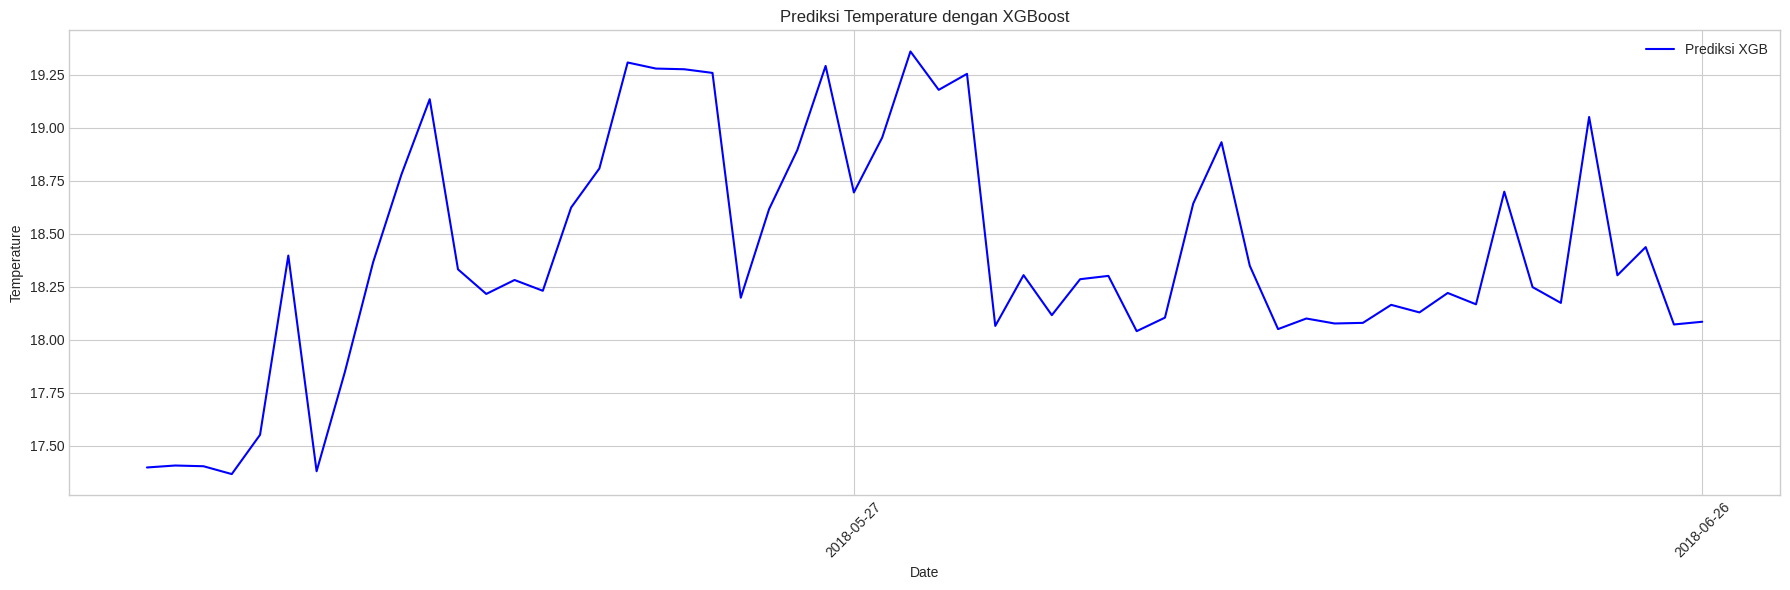

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# DataFrame untuk hasil prediksi
results = df_test1.copy()  # Buat salinan dataframe agar tidak merusak dataframe asli
results['Predicted'] = df_test1['TP_XGB']  # Menggunakan hasil prediksi dari GBR

# Ubah 'date' menjadi tipe data datetime
results['date'] = pd.to_datetime(df_test1['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Set 'date' sebagai index untuk resampling
results.set_index('date', inplace=True)

# Pilih hanya kolom yang relevan untuk resampling
results_for_resample = results[['Predicted']]

# Resample data to daily frequency
daily_results = results_for_resample.resample('D').mean().reset_index()

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(daily_results['date'], daily_results['Predicted'], label='Prediksi XGB', color='blue')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan XGBoost')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Berdasarkan output di atas, diketahui bahwa menuju akhir musim semi suhu cukup meningkat dan sepanjang musim panas di bulan Juni suhu cenderung rendah, tidak terlalu panas.*

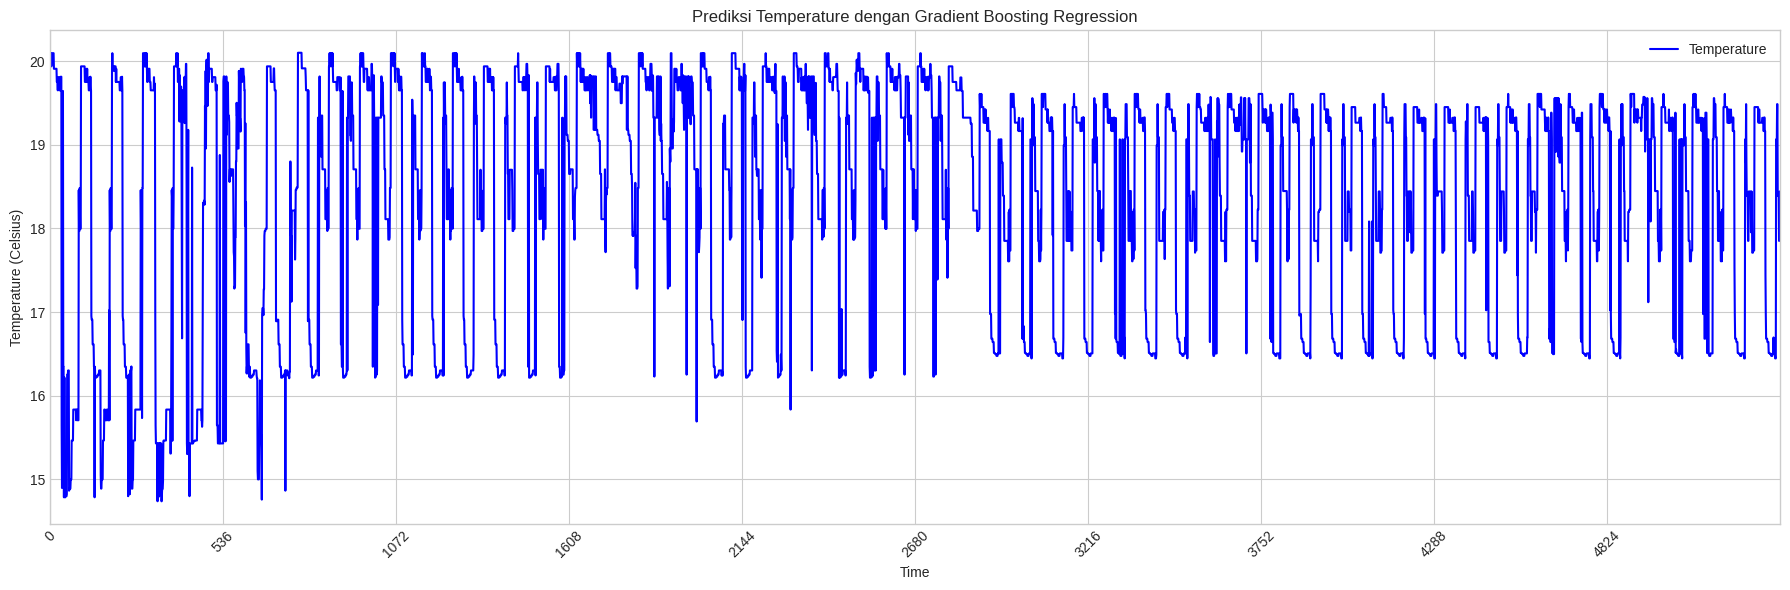

In [ ]:
import matplotlib.pyplot as plt

# Buat plot berdasarkan waktu (misalnya indeks)
plt.figure(figsize=(18, 6))  # Memperbesar ukuran plot
plt.plot(df_test1.index, df_test1['TP_XGB'], label='Temperature', color='blue')

# Mengatur batas x-axis untuk memperluas skala
plt.xlim(0, len(df_test1.index) - 1)  # Menampilkan seluruh rentang data

plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Prediksi Temperature dengan Gradient Boosting Regression')
plt.legend()
plt.grid(True)

# Menambahkan lebih banyak tick marks pada x-axis
plt.xticks(ticks=range(0, len(df_test1.index), len(df_test1.index) // 10), rotation=45)

plt.tight_layout()
plt.show()

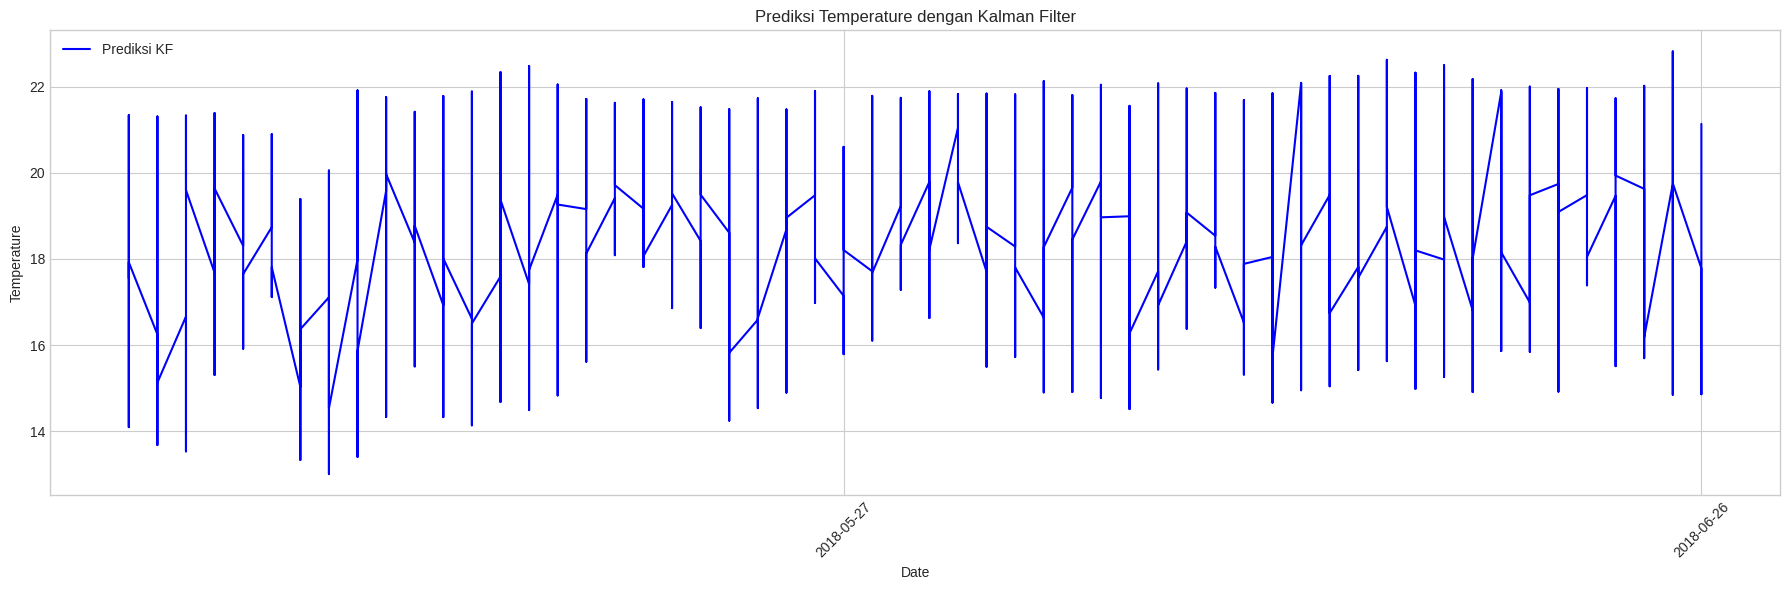

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# DataFrame untuk hasil prediksi
results = df_test1.copy()  # Buat salinan dataframe agar tidak merusak dataframe asli
results['Predicted'] = df_test1['TP_KF']  # Menggunakan hasil prediksi dari Kalman Filter

# Ubah 'date' menjadi tipe data datetime
results['date'] = pd.to_datetime(df_test1['date'])

# Urutkan berdasarkan 'date' untuk plot yang benar
results = results.sort_values('date')

# Plot hasil
plt.figure(figsize=(18, 6))
plt.plot(results['date'], results['Predicted'], label='Prediksi KF', color='blue')

# Menambahkan label dan judul
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prediksi Temperature dengan Kalman Filter')
plt.legend()

# Mengatur format tanggal pada sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

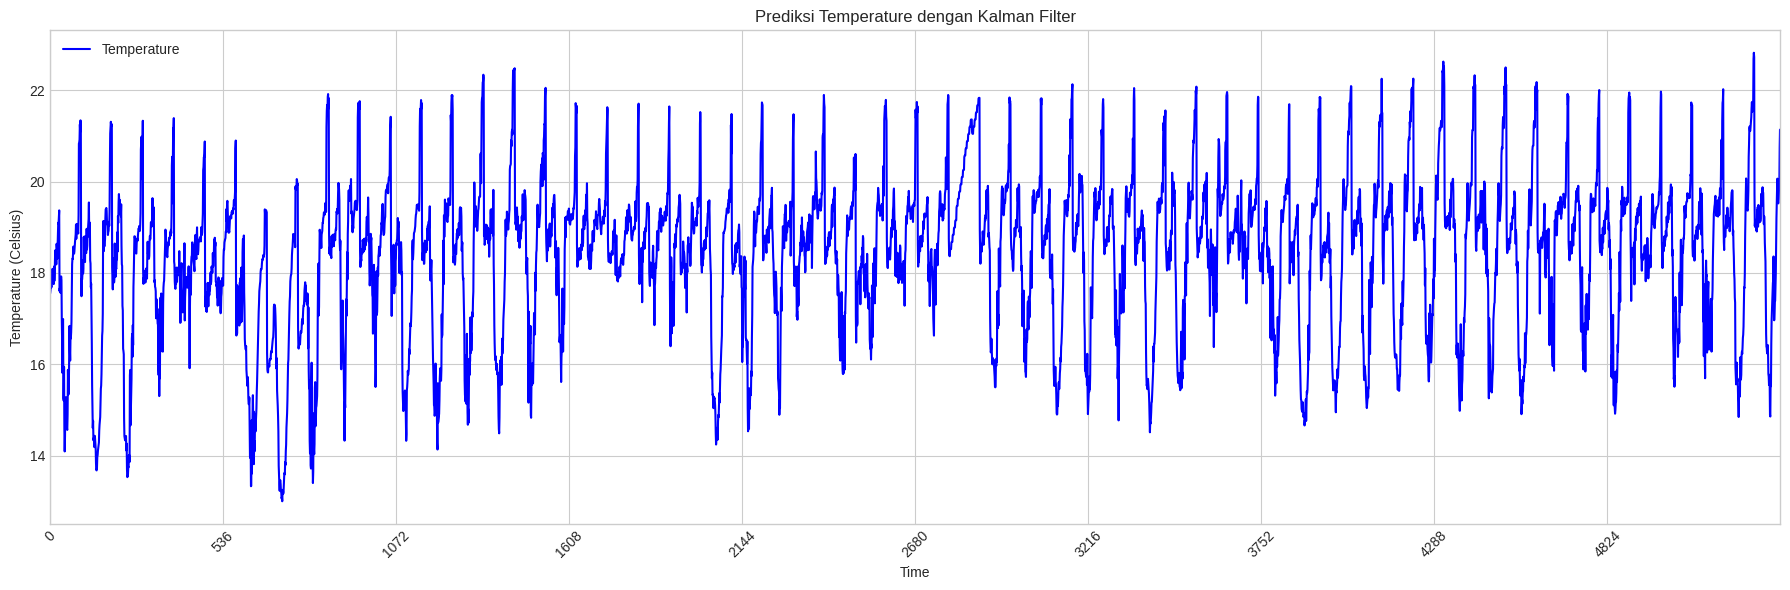

In [ ]:
import matplotlib.pyplot as plt

# Buat plot berdasarkan waktu (misalnya indeks)
plt.figure(figsize=(18, 6))  # Memperbesar ukuran plot
plt.plot(df_test1.index, df_test1['TP_KF'], label='Temperature', color='blue')

# Mengatur batas x-axis untuk memperluas skala
plt.xlim(0, len(df_test1.index) - 1)  # Menampilkan seluruh rentang data

plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Prediksi Temperature dengan Kalman Filter')
plt.legend()
plt.grid(True)

# Menambahkan lebih banyak tick marks pada x-axis
plt.xticks(ticks=range(0, len(df_test1.index), len(df_test1.index) // 10), rotation=45)

plt.tight_layout()
plt.show()